<a href="https://colab.research.google.com/github/tanmayi-sharma/Parking-Citations-Analysis/blob/main/Citiations_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Exploratory Data Analysis of Parking Citations Data

* This notebook contains Exploratory Data analysis of Parking citations data
* It has the following subsections:
>1. Data Collection and importing libraries
>2. Data manipulation for extracting addresswise count of tickets issued
>3. Relevant plots showing top 5 addresswise tickets
>4. Extracting tickets issued on Commercial Vs Non- Commercial Vehicles
>5. Visualizing Ticket counts issued to commercial vehicles and non commercial vehicles in Google time range
>6. Tickets issued to commercial vehicles and non commercial vehicles in Meta time range
>7. Visualizing Tickets issued to commercial vehicles and non commercial vehicles in Apple time range
>8. Looking at more Possible Slicings - Top 10 violation descriptions in all three years
>9. Limitations of parking data

##1. Data Collection and importing libraries

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import folium
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
df = pd.read_csv('/content/drive/My Drive/Parking citations/parking_citations_covid_2020_2022.csv')

<ipython-input-3-62397d62e743>:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/drive/My Drive/Parking citations/parking_citations_covid_2020.csv')


In [ ]:
df.columns

Index(['Ticket number', 'Issue Date', 'Issue time', 'Meter Id', 'Marked Time',
       'RP State Plate', 'Plate Expiry Date', 'VIN', 'Make', 'Body Style',
       'Color', 'Location', 'Route', 'Agency', 'Violation code',
       'Violation Description', 'Fine amount', 'Latitude', 'Longitude',
       'Agency Description', 'Color Description', 'Body Style Description'],
      dtype='object')

In [ ]:
df['Issue Date'] = pd.to_datetime(df['Issue Date'])

In [ ]:
time_null = df['Issue time'].isna().sum()

In [ ]:
time_null / df.shape[0]

0.00011879316564161249

In [ ]:
df.dropna(subset = ['Issue time'],inplace = True)

In [ ]:
df['Issue time'].astype(int).astype(str).str.pad(4, fillchar='0')

0          1343
1          1634
2          1628
3          0214
4          0143
           ... 
5757902    1639
5757903    1705
5757904    1641
5757905    1639
5757906    1647
Name: Issue time, Length: 5757223, dtype: object

In [ ]:
df['Issue time'] = pd.to_datetime(df['Issue time'], format = '%H%M', errors = 'coerce').dt.time

In [ ]:
df['Issue time']

0          13:43:00
1          16:34:00
2          16:28:00
3          21:04:00
4          14:03:00
             ...   
5757902    16:39:00
5757903    17:05:00
5757904    16:41:00
5757905    16:39:00
5757906    16:47:00
Name: Issue time, Length: 5757223, dtype: object

In [ ]:
#df['Issue time'] = pd.to_datetime(df['Issue time'], format = '%H%M', errors = 'coerce').dt.time

In [ ]:
dfg = df[(df['Issue Date'] >= '02-15-2020') & (df['Issue Date'] <= '10-15-2022' ) ]

In [ ]:
dfg.dropna(subset = ['Issue time'],inplace = True)

<ipython-input-14-035f1b6d4074>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfg.dropna(subset = ['Issue time'],inplace = True)


##2. Data manipulation for extracting addresswise count of tickets issued

In [ ]:
grouped = dfg.groupby('Location')['Ticket number'].count().reset_index(name='Total Tickets')

In [ ]:
top_10 = grouped.nlargest(10, 'Total Tickets')['Location']

In [ ]:
topp_10 = grouped.nlargest(10, 'Total Tickets')

In [ ]:
topp_10 = topp_10[["Location", "Total Tickets"]].reset_index(drop=True)

In [ ]:
topp_10

,Location,Total Tickets
0,1600 IRVING TABOR CT,7489
1,1301 ELECTRIC AVE,4945
2,600 SPRING ST S,4796
3,5901 98TH ST W,4215
4,11100 WEDDINGTON ST,3434
5,645 9TH ST W,3220
6,7300 MULHOLLAND DR,2978
7,1152 LEMOYNE ST,2930
8,101 LARCHMONT BL N,2920
9,249 CHICAGO ST N,2862


In [ ]:
top_10_data = dfg[dfg['Location'].isin(top_10)]

In [ ]:
top_10_data.shape

(39789, 22)

### Location 1

In [ ]:
location1 = top_10_data[top_10_data['Location'] == '1600 IRVING TABOR CT']

In [ ]:
location1.shape

In [ ]:
location1_2020 = location1[(location1['Issue Date'] < '01-01-2021') & (location1['Issue Date']>='02-15-2020')]

In [ ]:
location1_2020.shape

In [ ]:
location1_2021 = location1[(location1['Issue Date'] < '01-01-2022') & (location1['Issue Date']>='01-01-2021')]

In [ ]:
location1_2021.shape

In [ ]:
location1_2022 = location1[(location1['Issue Date'] < '10-16-2022') & (location1['Issue Date']>='01-01-2022')]

In [ ]:
location1_2022.shape

1. We see a sharp raise in ticket counts in the '1600 IRVING TABOR CT' late in the morning peaking around at 11am with 245 tickets in 2020. This might be due to the morning rush hours which might have led to a raise in the tickets. While we see a drop in ticket counts later in the evening.
2. In 2021, a similar trend is observed but with a slight increased number of tickets compared to 2020.
3. In 2022, the number tickets issued seemed to more that both the years, peaking over 400 tickets at around 12 noon.

1. Taking 2020 as baseline, we see the ticket count spiked up with 58% in 2021 compared to 2020.
2. While in 2022, the ticket count decreased by 12% compared to 2021.

In [ ]:
hourly_counts_loc1_2020 = location1_2020.groupby(location1_2020["Issue time"].apply(lambda x: x.hour))["Ticket number"].count()

In [ ]:
hourly_counts_loc1_2020

In [ ]:
hourly_counts_loc1_2021 = location1_2021.groupby(location1_2021["Issue time"].apply(lambda x: x.hour))["Ticket number"].count()

In [ ]:
hourly_counts_loc1_2021

In [ ]:
hourly_counts_loc1_2022 = location1_2022.groupby(location1_2022["Issue time"].apply(lambda x: x.hour))["Ticket number"].count()

In [ ]:
hourly_counts_loc1_2022

In [ ]:
# combined_df = pd.concat([hourly_counts_loc1_2020, hourly_counts_loc1_2021, hourly_counts_loc1_2022], axis=1)
# totals = combined_df.sum(axis=1)
# ax = combined_df.plot(kind='bar', stacked=True, figsize=(20, 10))
# plt.legend(['2020', '2021', '2022'])
# for i, total in enumerate(totals):
#     ax.text(i, total+2, str(total), ha='center')
# ax.set_xticks(range(25))
# ax.set_xlabel('Hour')
# ax.set_ylabel('Ticket Count')
# ax.set_title('Stacked Bar Plot of Location1 Data (2020-2022)')
# plt.show()

1. This stacked graph shows the overall number of tickets issued in the years 2020, 2021 and 2022 at 1600 IRVING TABOR CT.
2. The late morning rush hour from around 10am to 12pm results in a spike in citations year after year.

Fine amounts of location1 each year

1. The number of tickets issued on Meter Expiration violation are seen to beore in this location for the three years.
2. People seemed to park the vehicles overtime in this locality.

### Location 2

In [ ]:
location2 = top_10_data[top_10_data['Location'] == '1301 ELECTRIC AVE']

In [ ]:
location2.shape

In [ ]:
location2_2020 = location2[(location2['Issue Date'] < '01-01-2021') & (location2['Issue Date']>='02-15-2020')]

In [ ]:
location2_2020.shape

In [ ]:
location2_2021 = location2[(location2['Issue Date'] < '01-01-2022') & (location2['Issue Date']>='01-01-2021')]

In [ ]:
location2_2021.shape

In [ ]:
location2_2022 = location2[(location2['Issue Date'] <= '10-15-2022') & (location2['Issue Date']>='01-01-2022')]

In [ ]:
location2_2022.shape

1. In 2020, we see the similar trend as in the first location where the ticketing spiked at around 11am - 12 pm with highest being marked 111 for the year.
2. In 2021, the highest number of tickets seemed to increase more than twice compared to 2020. Although, the trend looks pretty much the same.
3. The most number of tickets were seen in 2022, with the highest being issued at around 12 pm with over 400 tickets.

1. Keeping 2020 as baseline, there is an increase with whooping 158% in 2021 compared to that of 2020. Might be due to increased mobility and less space to park.
2. While the percentage during 2022 decreased to 34% compared to 2021.

In [ ]:
hourly_counts_loc2_2020 = location2_2020.groupby(location2_2020["Issue time"].apply(lambda x: x.hour))["Ticket number"].count()

In [ ]:
hourly_counts_loc2_2020

In [ ]:
hourly_counts_loc2_2021 = location2_2021.groupby(location2_2021["Issue time"].apply(lambda x: x.hour))["Ticket number"].count()

In [ ]:
hourly_counts_loc2_2021

In [ ]:
hourly_counts_loc2_2022 = location2_2022.groupby(location2_2022["Issue time"].apply(lambda x: x.hour))["Ticket number"].count()

In [ ]:
hourly_counts_loc2_2022

In [ ]:
# combined2_df = pd.concat([hourly_counts_loc2_2020, hourly_counts_loc2_2021, hourly_counts_loc2_2022], axis=1)
# totals2 = combined2_df.sum(axis=1)
# ax = combined2_df.plot(kind='bar', stacked=True, figsize=(20, 10))
# plt.legend(['2020', '2021', '2022'])
# for i, total in enumerate(totals2):
#     ax.text(i, total+2, str(total), ha='center')
# ax.set_xticks(range(25))
# ax.set_xlabel('Hour')
# ax.set_ylabel('Ticket Count')
# ax.set_title('Stacked Bar Plot of Location2 Data (2020-2022)')
# plt.show()

1. The meter expiration violation spiked up more than any other violation in 1301 Electric ave. This is similar to the previous location.

###Location 3

In [ ]:
location3 = top_10_data[top_10_data['Location'] == '600 SPRING ST S']

In [ ]:
location3

In [ ]:
location3_2020 = location3[(location3['Issue Date'] < '01-01-2021') & (location3['Issue Date']>='02-15-2020')]

In [ ]:
location3_2020.shape[0]

In [ ]:
#location3_2021.shape[0]

In [ ]:
#location3_2022.shape[0]

In [ ]:
location3_2021 = location3[(location3['Issue Date'] < '01-01-2022') & (location3['Issue Date']>='01-01-2021')]

In [ ]:
location3_2022 = location3[(location3['Issue Date'] <= '10-15-2022') & (location3['Issue Date']>='01-01-2022')]

1. This location has a slightly different trend compared to the previous locations. The ticketing peaked it count later in the evening period after around 8 pm. This might be due to presence of places of night life around this area.
2. This pattern is seen in all three years with fewer variations.
3. But commonly, there is a highest peak observed at around 9 - 10 pm each year.

1. The total number of tickets issued slightly increased (by 13%) in 2021 compared to that of 2020.
2. While it decreased by 26% in 2022 compared to that of 2021.

In [ ]:
hourly_counts_loc3_2020 = location3_2020.groupby(location3_2020["Issue time"].apply(lambda x: x.hour))["Ticket number"].count()

In [ ]:
hourly_counts_loc3_2021 = location3_2021.groupby(location3_2021["Issue time"].apply(lambda x: x.hour))["Ticket number"].count()

In [ ]:
hourly_counts_loc3_2022 = location3_2022.groupby(location3_2022["Issue time"].apply(lambda x: x.hour))["Ticket number"].count()

In [ ]:
# combined3_df = pd.concat([hourly_counts_loc3_2020, hourly_counts_loc3_2021, hourly_counts_loc3_2022], axis=1)
# totals3 = combined3_df.sum(axis=1)
# ax = combined3_df.plot(kind='bar', stacked=True, figsize=(20, 10))
# plt.legend(['2020', '2021', '2022'])
# for i, total in enumerate(totals3):
#     ax.text(i, total+2, str(total), ha='center')
# ax.set_xticks(range(25))
# ax.set_xlabel('Hour')
# ax.set_ylabel('Ticket Count')
# ax.set_title('Stacked Bar Plot of Location3 Data (2020-2022)')
# plt.show()

1. The tickets issued due to parking at the white zone is seen more in this area, which makes it more evident that there is a night life in this area ( white zone ticket is issued when parked for long at the white curb which is meant only for pick up and drop off passengers.)

### Location 4

In [ ]:
location4 = top_10_data[top_10_data['Location'] == '5901 98TH ST W']

In [ ]:
location4.shape

In [ ]:
location4_2020 = location4[(location4['Issue Date'] < '01-01-2021') & (location4['Issue Date']>='02-15-2020')]

In [ ]:
location4_2020.shape[0]

In [ ]:
location4_2021 = location4[(location4['Issue Date'] < '01-01-2022') & (location4['Issue Date']>='01-01-2021')]

In [ ]:
location4_2021.shape[0]

In [ ]:
location4_2022 = location4[(location4['Issue Date'] <= '10-15-2022') & (location4['Issue Date']>='01-01-2022')]

In [ ]:
location4_2022.shape

1. This trend has more tickets issued in the early hours of the morning, which might indicate the presence of physical fitness centers or breakfast places.
2. Interestingly, only 2 tickets were issued in 2022 till october.

1. The tickets issued kept decreasing year by year in this area.

In [ ]:
hourly_counts_loc4_2020 = location4_2020.groupby(location4_2020["Issue time"].apply(lambda x: x.hour))["Ticket number"].count()

In [ ]:
hourly_counts_loc4_2021 = location4_2021.groupby(location4_2021["Issue time"].apply(lambda x: x.hour))["Ticket number"].count()

In [ ]:
hourly_counts_loc4_2022 = location4_2022.groupby(location4_2022["Issue time"].apply(lambda x: x.hour))["Ticket number"].count()

In [ ]:
# combined4_df = pd.concat([hourly_counts_loc4_2020, hourly_counts_loc4_2021, hourly_counts_loc4_2022], axis=1)
# totals4 = combined4_df.sum(axis=1)
# ax = combined4_df.plot(kind='bar', stacked=True, figsize=(20, 10))
# plt.legend(['2020', '2021', '2022'])
# for i, total in enumerate(totals4):
#     ax.text(i, total+2, str(total), ha='center')
# ax.set_xticks(range(25))
# ax.set_xlabel('Hour')
# ax.set_ylabel('Ticket Count')
# ax.set_title('Stacked Bar Plot of Location4 Data (2020-2022)')
# plt.show()

1. Again people seem to park overtime in this area more.

### Location 5

In [ ]:
location5 = top_10_data[top_10_data['Location'] == '11100 WEDDINGTON ST']

In [ ]:
location5.shape

In [ ]:
location5_2020 = location5[(location5['Issue Date'] < '01-01-2021') & (location5['Issue Date']>='02-15-2020')]

In [ ]:
location5_2021 = location5[(location5['Issue Date'] < '01-01-2022') & (location5['Issue Date']>='01-01-2021')]

In [ ]:
location5_2022 = location5[(location5['Issue Date'] <= '10-15-2022') & (location5['Issue Date']>='01-01-2022')]

In [ ]:
hourly_counts_loc5_2020 = location5_2020.groupby(location5_2020["Issue time"].apply(lambda x: x.hour))["Ticket number"].count()

In [ ]:
hourly_counts_loc5_2021 = location5_2021.groupby(location5_2021["Issue time"].apply(lambda x: x.hour))["Ticket number"].count()

In [ ]:
hourly_counts_loc5_2022 = location5_2022.groupby(location5_2022["Issue time"].apply(lambda x: x.hour))["Ticket number"].count()

In [ ]:
# combined5_df = pd.concat([hourly_counts_loc5_2020, hourly_counts_loc5_2021, hourly_counts_loc5_2022], axis=1)
# totals5 = combined5_df.sum(axis=1)
# ax = combined5_df.plot(kind='bar', stacked=True, figsize=(20, 10))
# plt.legend(['2020', '2021', '2022'])
# for i, total in enumerate(totals5):
#     ax.text(i, total+2, str(total), ha='center')
# ax.set_xticks(range(25))
# # ax.set_xlabel('Hour')
# ax.set_ylabel('Ticket Count')
# ax.set_title('Stacked Bar Plot of Location5 Data (2020-2022)')
# plt.show()

##3. Relevant plots showing top 5 addresewise tickets

In [ ]:
fig, axes = plt.subplots(5, 3, figsize=(22, 19))

data_frames = [location1_2020, location1_2021, location1_2022]
for i, year_data in enumerate(data_frames):
    hourly_counts_1 = year_data.groupby(year_data["Issue time"].apply(lambda x: x.hour))["Ticket number"].count()
    #hourly_counts_1 = hourly_counts_1.sort_values(ascending=True)
    #max_hour = hourly_counts.idxmax()
    ax = axes[0,i]
    hourly_counts_1.plot(kind='bar', ax=ax)
    ax.set_xlabel("Issue Hour")
    ax.set_ylabel("Number of Tickets")
    ax.set_title(f"Hourly Ticket Counts at '1600 IRVING TABOR CT' in {2020 + i}")

    #ax.axvline(x=max_hour, color='red', linestyle='--', label=f'Max Tickets at {max_hour} hour')
    if i == 0:
        ax.legend()
    for bar in ax.containers:
            ax.bar_label(bar, fmt='%.0f', label_type='edge', fontsize=10)

data_frames2 = [location2_2020, location2_2021, location2_2022]
for i, year_data in enumerate(data_frames2):
    hourly_counts_2 = year_data.groupby(year_data["Issue time"].apply(lambda x: x.hour))["Ticket number"].count()
    #hourly_counts_2 = hourly_counts_2.sort_values(ascending=True)
    #max_hour = hourly_counts.idxmax()
    ax = axes[1,i]
    hourly_counts_2.plot(kind='bar', ax=ax)
    ax.set_xlabel("Issue Hour")
    ax.set_ylabel("Number of Tickets")
    ax.set_title(f"Hourly Ticket Counts at '1301 ELECTRIC AVE' in {2020 + i}")

    #ax.axvline(x=max_hour, color='red', linestyle='--', label=f'Max Tickets at {max_hour} hour')
    if i == 0:
        ax.legend()
    for bar in ax.containers:
            ax.bar_label(bar, fmt='%.0f', label_type='edge', fontsize=10)

data_frames3 = [location3_2020, location3_2021, location3_2022]
for i, year_data in enumerate(data_frames3):
    hourly_counts_3 = year_data.groupby(year_data["Issue time"].apply(lambda x: x.hour))["Ticket number"].count()
    #hourly_counts_3 = hourly_counts_3.sort_values(ascending=True)
    ax = axes[2,i]
    hourly_counts_3.plot(kind='bar', ax=ax)
    ax.set_xlabel("Issue Hour")
    ax.set_ylabel("Number of Tickets")
    ax.set_title(f"Hourly Ticket Counts at '600 SPRING ST S' in {2020 + i}")

    #ax.axvline(x=max_hour, color='red', linestyle='--', label=f'Max Tickets at {max_hour} hour')
    if i == 0:
        ax.legend()
    for bar in ax.containers:
            ax.bar_label(bar, fmt='%.0f', label_type='edge', fontsize=10)

data_frames4 = [location4_2020, location4_2021, location4_2022]
for i, year_data in enumerate(data_frames4):
    hourly_counts_4 = year_data.groupby(year_data["Issue time"].apply(lambda x: x.hour))["Ticket number"].count()
    #hourly_counts_4 = hourly_counts_4.sort_values(ascending=True)
    #max_hour = hourly_counts.idxmax()
    ax = axes[3,i]
    hourly_counts_4.plot(kind='bar', ax=ax)
    ax.set_xlabel("Issue Hour")
    ax.set_ylabel("Number of Tickets")
    ax.set_title(f"Hourly Ticket Counts at '5901 98TH ST W' in {2020 + i}")

    #ax.axvline(x=max_hour, color='red', linestyle='--', label=f'Max Tickets at {max_hour} hour')
    if i == 0:
        ax.legend()
    for bar in ax.containers:
            ax.bar_label(bar, fmt='%.0f', label_type='edge', fontsize=10)



data_frames5 = [location5_2020, location5_2021, location5_2022]
for i, year_data in enumerate(data_frames5):
    hourly_counts_5 = year_data.groupby(year_data["Issue time"].apply(lambda x: x.hour))["Ticket number"].count()
    #hourly_counts_5 = hourly_counts_5.sort_values(ascending=True)
    #max_hour = hourly_counts.idxmax()
    ax = axes[4,i]
    hourly_counts_5.plot(kind='bar', ax=ax)
    ax.set_xlabel("Issue Hour")
    ax.set_ylabel("Number of Tickets")
    ax.set_title(f"Hourly Ticket Counts at '11100 WEDDINGTON ST' in {2020 + i}")
    #ax.axvline(x=max_hour, color='red', linestyle='--', label=f'Max Tickets at {max_hour} hour')
    if i == 0:
        ax.legend()
    for bar in ax.containers:
            ax.bar_label(bar, fmt='%.0f', label_type='edge', fontsize=10)
plt.tight_layout()
plt.show()

In [ ]:

def plot_yearly_ticket_change(location_data, title, ax):
    location_filtered = location_data[(location_data['Issue Date'] < '10-15-2022') & (location_data['Issue Date'] >= '02-15-2020')]
    tickets_per_year = location_filtered.groupby(location_filtered['Issue Date'].dt.year)['Ticket number'].count()
    pct_change = tickets_per_year.pct_change() * 100
    pct_change.plot(kind='bar', ax=ax)
    for p in ax.patches:
        ax.annotate(str(p.get_height().round(2)) + '%', (p.get_x() + 0.15, p.get_height() + 1))
    ax.set_ylabel("Percentage Change")
    ax.set_title(title)

locations = [location1, location2, location3, location4, location5]

fig, axes = plt.subplots(1, len(locations), figsize=(30, 10))

titles = [
    "Yearly Ticket Count Change - 1600 IRVING TABOR CT Location",
    "Yearly Ticket Count Change - 1301 ELECTRIC AVE Location",
    "Yearly Ticket Count Change - 600 SPRING ST S Location",
    "Yearly Ticket Count Change - 5901 98TH ST W Location",
    "Yearly Ticket Count Change - 11100 WEDDINGTON ST Location"
]

for i, (location_data, title, ax) in enumerate(zip(locations, titles, axes)):
    plot_yearly_ticket_change(location_data, title, ax)

plt.tight_layout()
plt.show()


In [ ]:
import math

locations = [location1, location2, location3, location4, location5]

num_locations = len(locations)
num_cols = 2  # Number of columns in the grid
num_rows = math.ceil(num_locations / num_cols)  # Calculate the number of rows

fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 10))

# Flatten the axes array for easier indexing
axes = axes.ravel()

for i, location_data in enumerate(locations):
    ax = axes[i]
    ticket_count_by_code = location_data.groupby('Violation Description')['Ticket number'].count()
    ticket_count_by_code = ticket_count_by_code.sort_values(ascending=True).tail(10)
    ticket_count_by_code.plot(kind='barh', ax=ax)
    ax.set_xlabel("Total tickets")
    ax.set_ylabel("Violation Description")
    ax.set_title(f"Location {i + 1}")

    for bar in ax.containers:
        ax.bar_label(bar, fmt='%d', label_type='edge', fontsize=8)

# Remove any empty subplots if the number of locations is not a multiple of num_cols
if num_locations % num_cols != 0:
    for i in range(num_locations, num_rows * num_cols):
        fig.delaxes(axes[i])

plt.tight_layout()
plt.show()


In [ ]:
# ## Top 10 Violations occured in these top 10 ticketed areas
# violation_counts = top_10_data.groupby('Violation code')['Violation Description'].count().reset_index(name = 'Count')
# top_10_violations = violation_counts.nlargest(10, 'Count')['Violation code']
# topp_10_violations = violation_counts.nlargest(10, 'Count')
# top_10_violations_data = top_10_data[top_10_data['Violation code'].isin(top_10_violations)]
# top_10_violations_data.shape

##4. Extracting Tickets issued on Commercial Vs Non- Commercial Vehicles

In [ ]:
df['Body Style Description'].unique()

array(['PASSENGER CAR', 'PICK-UP TRUCK', 'VAN', 'MOTOR HOME',
       'COMMERCIAL', 'BUS', 'TRUCK', 'TRAILER', nan, 'LIMOUSINE', 'TEST'],
      dtype=object)

In [ ]:
df['Body Style Description'].isna().sum()/ df.shape[0]

0.0077158727393397825

In [ ]:
df['Body Style Description'].describe()

count           5712801
unique               10
top       PASSENGER CAR
freq            5212238
Name: Body Style Description, dtype: object

In [ ]:
df['Body Style Description'].value_counts()

PASSENGER CAR    5212238
PICK-UP TRUCK     180057
VAN                98532
COMMERCIAL         82481
TRUCK              73102
TRAILER            41679
MOTOR HOME         22585
BUS                 1865
LIMOUSINE            261
TEST                   1
Name: Body Style Description, dtype: int64

In [ ]:
df['Body Style Description'].mode()[0]


'PASSENGER CAR'

Mode imputation for missing Body Style Description

In [ ]:
df['Body Style Description'] = df['Body Style Description'].fillna(df['Body Style Description'].mode()[0])

In [ ]:
df['Body Style Description'].isna().sum()

0

In [ ]:
df['Body Style Description'].value_counts()

PASSENGER CAR    5256660
PICK-UP TRUCK     180057
VAN                98532
COMMERCIAL         82481
TRUCK              73102
TRAILER            41679
MOTOR HOME         22585
BUS                 1865
LIMOUSINE            261
TEST                   1
Name: Body Style Description, dtype: int64

In [ ]:
commercial_vehicles = ['COMMERCIAL', 'BUS', 'TRUCK', 'TRAILER']
non_commercial_vehicles = ['PASSENGER CAR', 'PICK-UP TRUCK', 'VAN', 'MOTOR HOME','LIMOUSINE', 'TEST']

In [ ]:
commercial_vehicles_data = df[df['Body Style Description'].isin(commercial_vehicles)]

In [ ]:
non_commercial_vehicles_data = df[df['Body Style Description'].isin(non_commercial_vehicles)]

##5. Visualizing Ticket counts issued to commercial vehicles and non commercial vehicles in Google time range

In [ ]:
commercial_vehicles_2020 = commercial_vehicles_data[(commercial_vehicles_data['Issue Date'] < '01-01-2021') & (commercial_vehicles_data['Issue Date']>='02-15-2020')]

In [ ]:
commercial_vehicles_2021 = commercial_vehicles_data[(commercial_vehicles_data['Issue Date'] < '01-01-2022') & (commercial_vehicles_data['Issue Date']>='01-01-2021')]

In [ ]:
commercial_vehicles_2022 = commercial_vehicles_data[(commercial_vehicles_data['Issue Date'] < '10-15-2022') & (commercial_vehicles_data['Issue Date']>='01-01-2022')]

In [ ]:
hourly_counts_comm_2020 = commercial_vehicles_2020.groupby(commercial_vehicles_2020["Issue time"].apply(lambda x: x.hour))["Ticket number"].count()
hourly_counts_comm_2021 = commercial_vehicles_2021.groupby(commercial_vehicles_2021["Issue time"].apply(lambda x: x.hour))["Ticket number"].count()
hourly_counts_comm_2022 = commercial_vehicles_2022.groupby(commercial_vehicles_2022["Issue time"].apply(lambda x: x.hour))["Ticket number"].count()

In [ ]:
non_commercial_vehicles_2020 = non_commercial_vehicles_data[(non_commercial_vehicles_data['Issue Date'] < '01-01-2021') & (non_commercial_vehicles_data['Issue Date']>='02-15-2020')]

In [ ]:
non_commercial_vehicles_2021 = non_commercial_vehicles_data[(non_commercial_vehicles_data['Issue Date'] < '01-01-2022') & (non_commercial_vehicles_data['Issue Date']>='01-01-2021')]

In [ ]:
non_commercial_vehicles_2022 = non_commercial_vehicles_data[(non_commercial_vehicles_data['Issue Date'] < '10-15-2022') & (non_commercial_vehicles_data['Issue Date']>='01-01-2022')]

In [ ]:
hourly_counts_non_comm_2020 = non_commercial_vehicles_2020.groupby(non_commercial_vehicles_2020["Issue time"].apply(lambda x: x.hour))["Ticket number"].count()
hourly_counts_non_comm_2021 = non_commercial_vehicles_2021.groupby(non_commercial_vehicles_2021["Issue time"].apply(lambda x: x.hour))["Ticket number"].count()
hourly_counts_non_comm_2022 = non_commercial_vehicles_2022.groupby(non_commercial_vehicles_2022["Issue time"].apply(lambda x: x.hour))["Ticket number"].count()

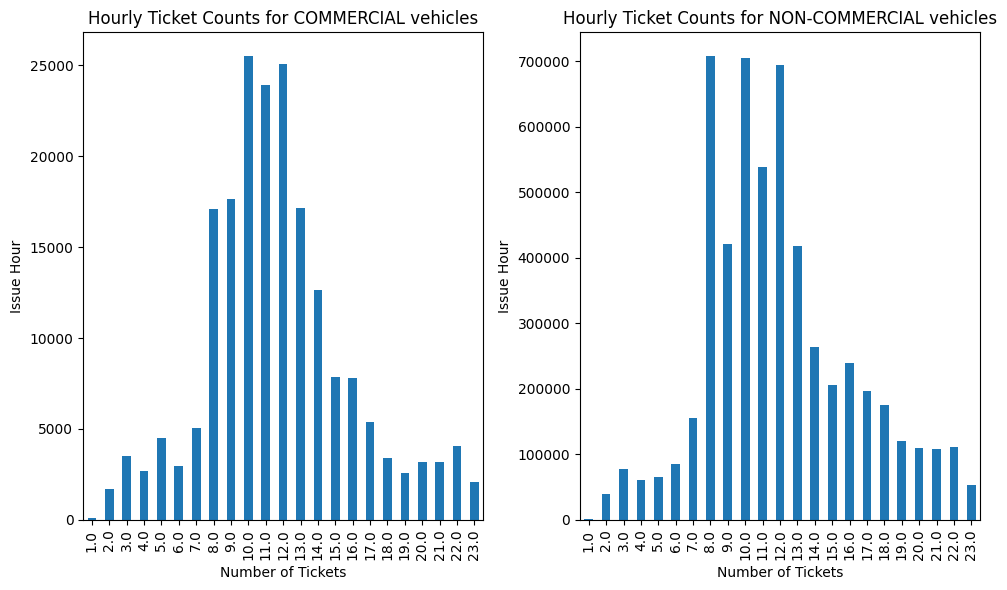

In [ ]:
hourly_counts_comm = commercial_vehicles_data.groupby(commercial_vehicles_data["Issue time"].apply(lambda x: x.hour))["Ticket number"].count()
hourly_counts_comm_s = hourly_counts_comm.sort_values(ascending=True)
hourly_counts_non_comm = non_commercial_vehicles_data.groupby(non_commercial_vehicles_data["Issue time"].apply(lambda x: x.hour))["Ticket number"].count()
hourly_counts_non_comm_s = hourly_counts_non_comm.sort_values(ascending=True)

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 6))

# Plot for commercial vehicles
ax1 = axes[0]
# for i, v in enumerate(hourly_counts_comm):
#      ax1.text(v, i, str(v), color='red', verticalalignment='center', horizontalalignment='left')
hourly_counts_comm.plot(kind='bar', ax=ax1)
ax1.set_xlabel("Number of Tickets")
ax1.set_ylabel("Issue Hour")
ax1.set_title("Hourly Ticket Counts for COMMERCIAL vehicles")

# Plot for non-commercial vehicles
ax2 = axes[1]
# for i, v in enumerate(hourly_counts_non_comm):
#     ax2.text(v, i, str(v), color='red', verticalalignment='center', horizontalalignment='left')
hourly_counts_non_comm.plot(kind='bar', ax=ax2)
ax2.set_xlabel("Number of Tickets")
ax2.set_ylabel("Issue Hour")
ax2.set_title("Hourly Ticket Counts for NON-COMMERCIAL vehicles")
# for bar in ax1.containers:
#       ax1.bar_label(bar, fmt='%d', label_type='edge', fontsize=5 )

plt.tight_layout()
plt.show()

In [ ]:
data_frames = [commercial_vehicles_2020, commercial_vehicles_2021, commercial_vehicles_2022]
data_frames_non = [non_commercial_vehicles_2020, non_commercial_vehicles_2021, non_commercial_vehicles_2022]


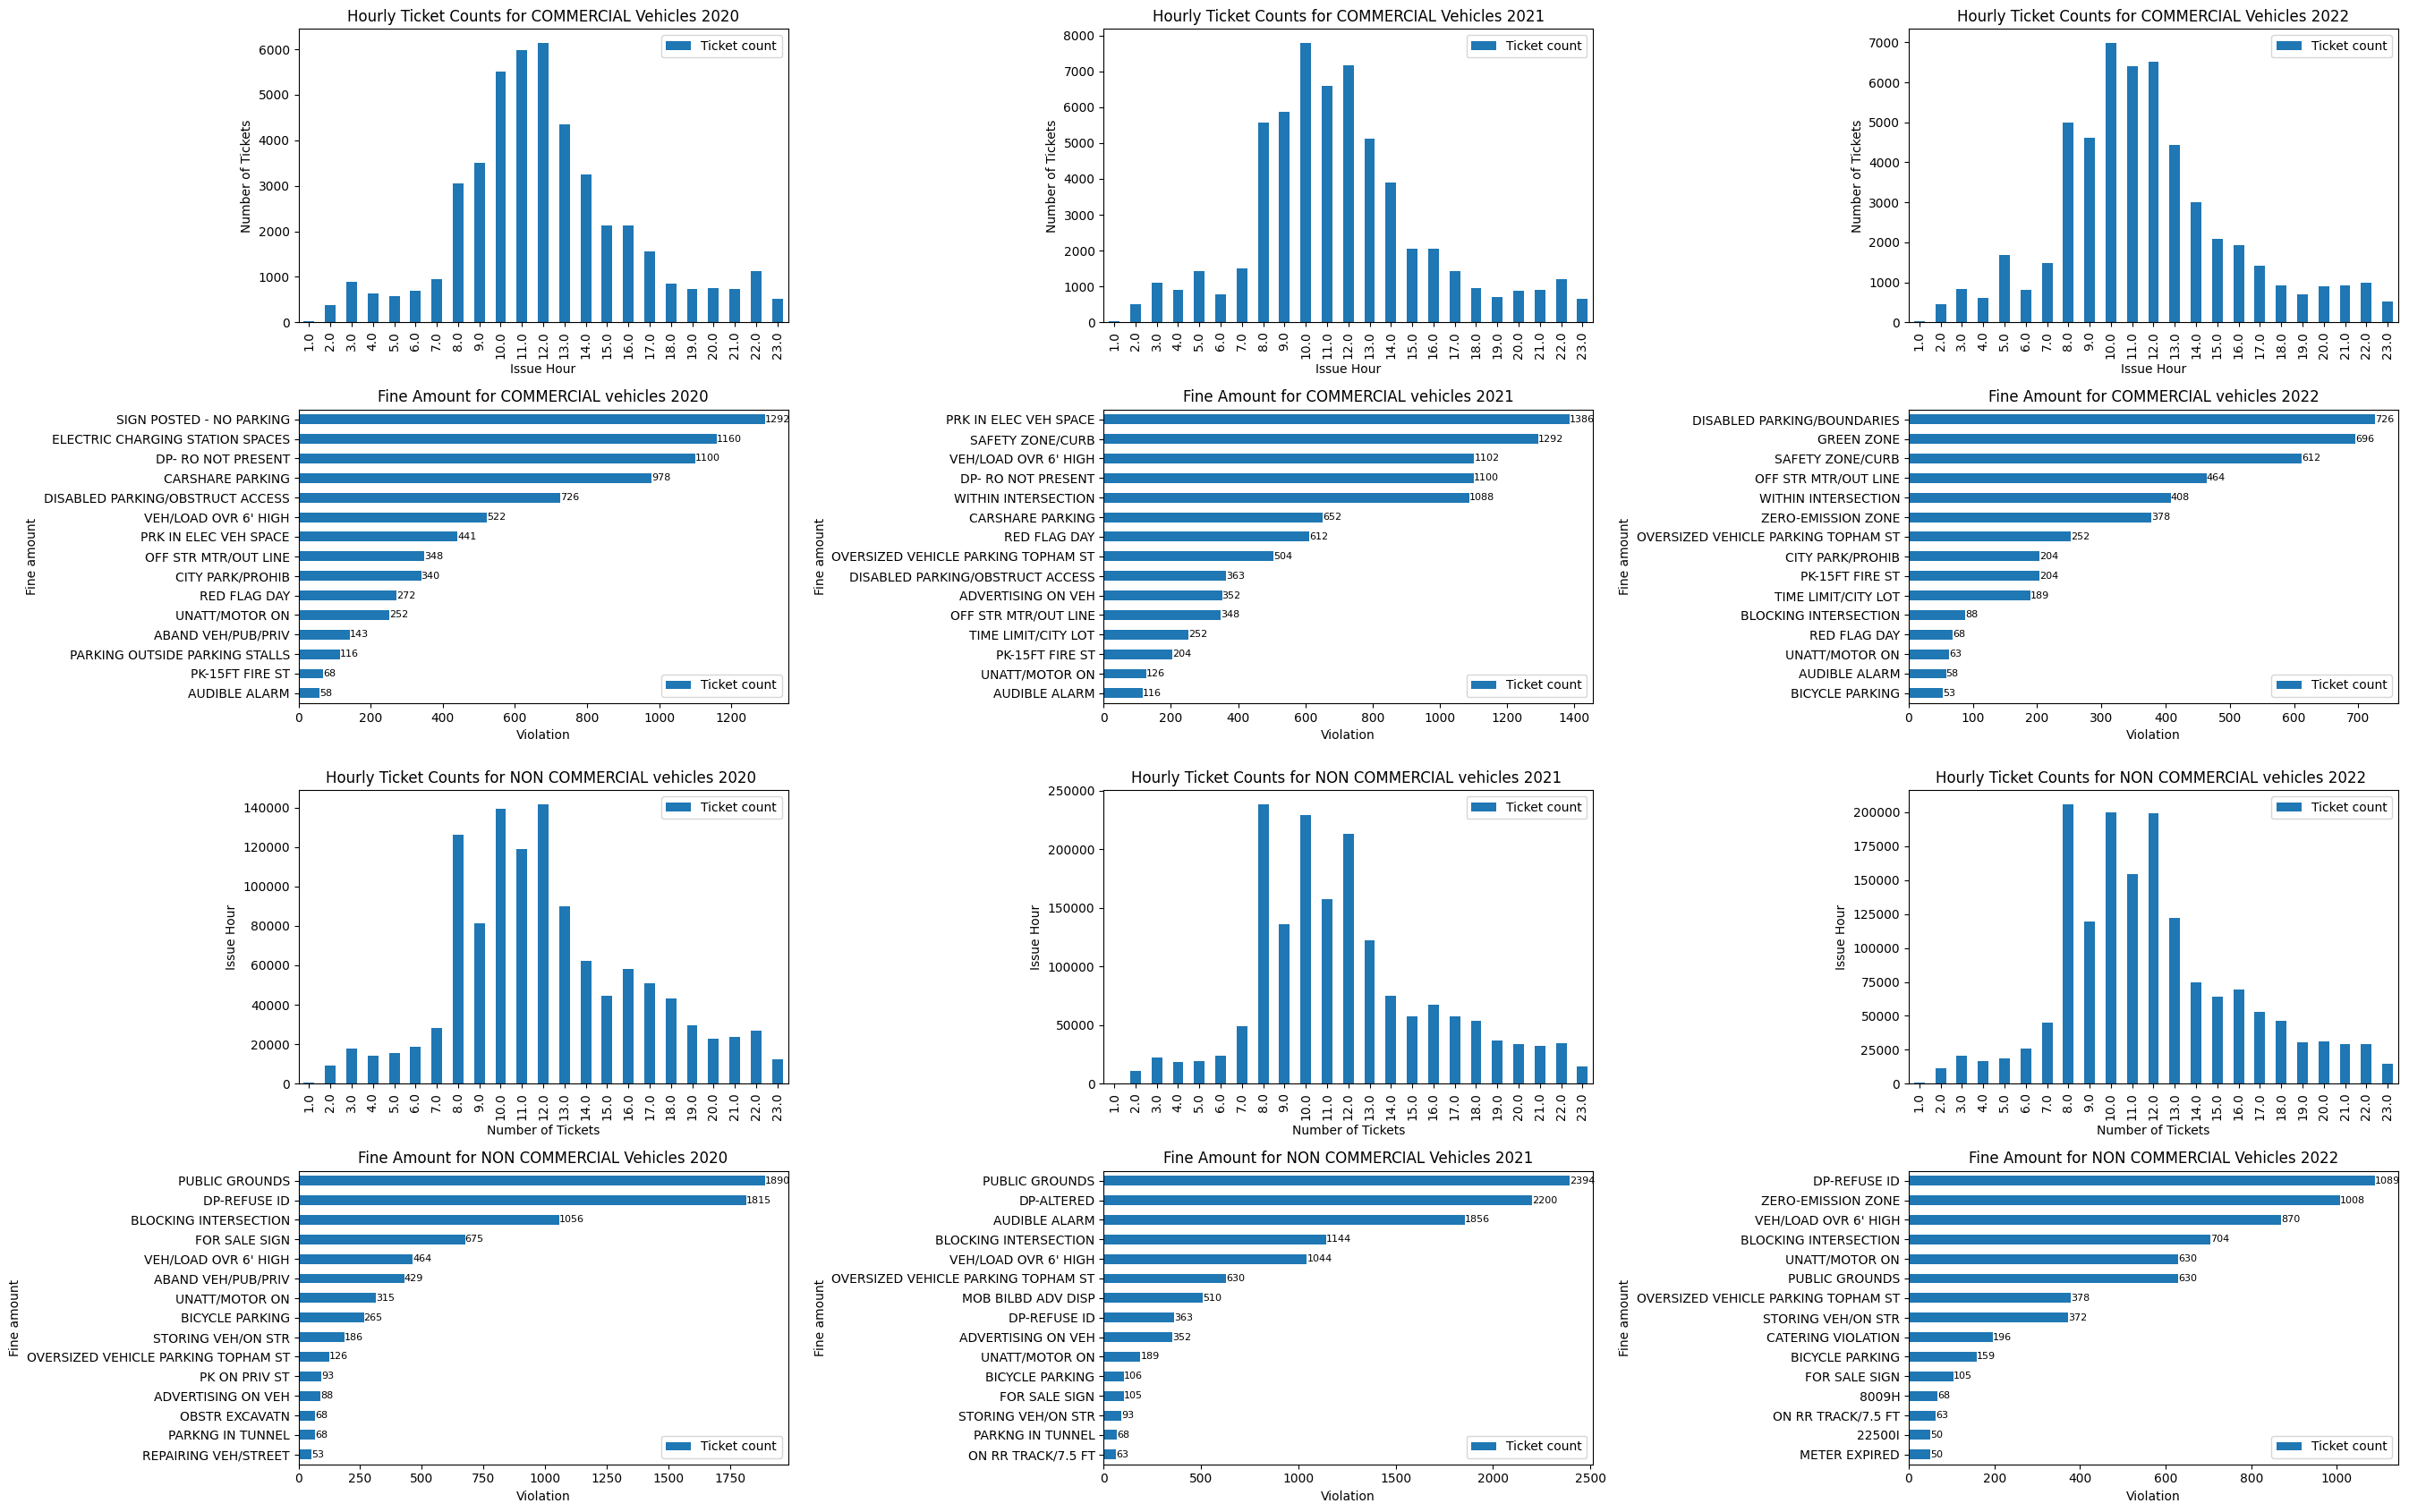

In [ ]:
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(27, 17))

# Plot Fine Amounts for Commercial Vehicles
for i, cost_data in enumerate(data_frames):
    cost_sum = cost_data.groupby(cost_data["Violation Description"])["Fine amount"].sum()
    cost_sum = cost_sum.sort_values(ascending=True)
    top_15_cost_sum = cost_sum.head(15)
    ax = axes[1, i]
    top_15_cost_sum.plot(kind='barh', ax=ax, label="Ticket count")
    ax.set_xlabel("Violation")
    ax.set_ylabel("Fine amount")
    ax.set_title(f"Fine Amount for COMMERCIAL vehicles {2020 + i}")
    ax.legend()
    #ax.grid()

    # Add value annotations
    for bar in ax.containers:
        ax.bar_label(bar, fmt='%d', label_type='edge', fontsize=8)

# Plot Hourly Ticket Counts for Commercial Vehicles
for i, year_data in enumerate(data_frames):
    hourly_counts = year_data.groupby(year_data["Issue time"].apply(lambda x: x.hour))["Ticket number"].count()
    #hourly_counts = hourly_counts.sort_values(ascending=True)
    ax = axes[0, i]
    hourly_counts.plot(kind='bar', ax=ax, label="Ticket count")
    ax.set_xlabel("Issue Hour")
    ax.set_ylabel("Number of Tickets")
    ax.set_title(f"Hourly Ticket Counts for COMMERCIAL Vehicles {2020 + i}")
    ax.legend()
    #ax.grid()

    # Add value annotations
    # for bar in ax.containers:
    #     ax.bar_label(bar, fmt='%d', label_type='edge', fontsize=8)

# Plot Hourly Ticket Counts for NON COMMERCIAL Vehicles
for i, year_data in enumerate(data_frames_non):
    hourly_counts = year_data.groupby(year_data["Issue time"].apply(lambda x: x.hour))["Ticket number"].count()
   # hourly_counts = hourly_counts.sort_values(ascending=True)
    ax = axes[2, i]
    hourly_counts.plot(kind='bar', ax=ax, label="Ticket count")
    ax.set_ylabel("Issue Hour")
    ax.set_xlabel("Number of Tickets")
    ax.set_title(f"Hourly Ticket Counts for NON COMMERCIAL vehicles {2020 + i} ")
    ax.legend()
    #ax.grid()

    # Add value annotations
    # for bar in ax.containers:
    #     ax.bar_label(bar, fmt='%d', label_type='edge', fontsize=8)

for i, cost_data in enumerate(data_frames_non):
    cost_sum = cost_data.groupby(cost_data["Violation Description"])["Fine amount"].sum()
    cost_sum = cost_sum.sort_values(ascending=True)
    top_15_cost_sum = cost_sum.head(15)
    ax = axes[3, i]
    top_15_cost_sum.plot(kind='barh', ax=ax, label="Ticket count")
    ax.set_xlabel("Violation")
    ax.set_ylabel("Fine amount")
    ax.set_title(f"Fine Amount for NON COMMERCIAL Vehicles {2020 + i}")
    ax.legend()
    #ax.grid()

    # Add value annotations
    for bar in ax.containers:
      ax.bar_label(bar, fmt='%d', label_type='edge', fontsize=8)

# Adjust spacing between subplots
plt.subplots_adjust(hspace=1)

plt.tight_layout()
plt.show()


##6. Tickets issued to commercial vehicles and non commercial vehicles in Meta time range

In [ ]:
commercial_vehicles_2020_meta = commercial_vehicles_data[(commercial_vehicles_data['Issue Date'] < '01-01-2021') & (commercial_vehicles_data['Issue Date']>='03-01-2020')]

In [ ]:
commercial_vehicles_2021_meta = commercial_vehicles_data[(commercial_vehicles_data['Issue Date'] < '01-01-2022') & (commercial_vehicles_data['Issue Date']>='01-01-2021')]

In [ ]:
commercial_vehicles_2022_meta = commercial_vehicles_data[(commercial_vehicles_data['Issue Date'] <= '05-22-2022') & (commercial_vehicles_data['Issue Date']>='01-01-2022')]

In [ ]:
non_commercial_vehicles_2020_meta = non_commercial_vehicles_data[(non_commercial_vehicles_data['Issue Date'] < '01-01-2021') & (non_commercial_vehicles_data['Issue Date']>='03-01-2020')]

In [ ]:
non_commercial_vehicles_2021_meta = non_commercial_vehicles_data[(non_commercial_vehicles_data['Issue Date'] < '01-01-2022') & (non_commercial_vehicles_data['Issue Date']>='01-01-2021')]

In [ ]:
non_commercial_vehicles_2022_meta = non_commercial_vehicles_data[(non_commercial_vehicles_data['Issue Date'] <= '05-22-2022') & (non_commercial_vehicles_data['Issue Date']>='01-01-2022')]

In [ ]:
data_frames_meta = [commercial_vehicles_2020_meta, commercial_vehicles_2021_meta, commercial_vehicles_2022_meta]
data_frames_non_meta = [non_commercial_vehicles_2020_meta, non_commercial_vehicles_2021_meta, non_commercial_vehicles_2022_meta]


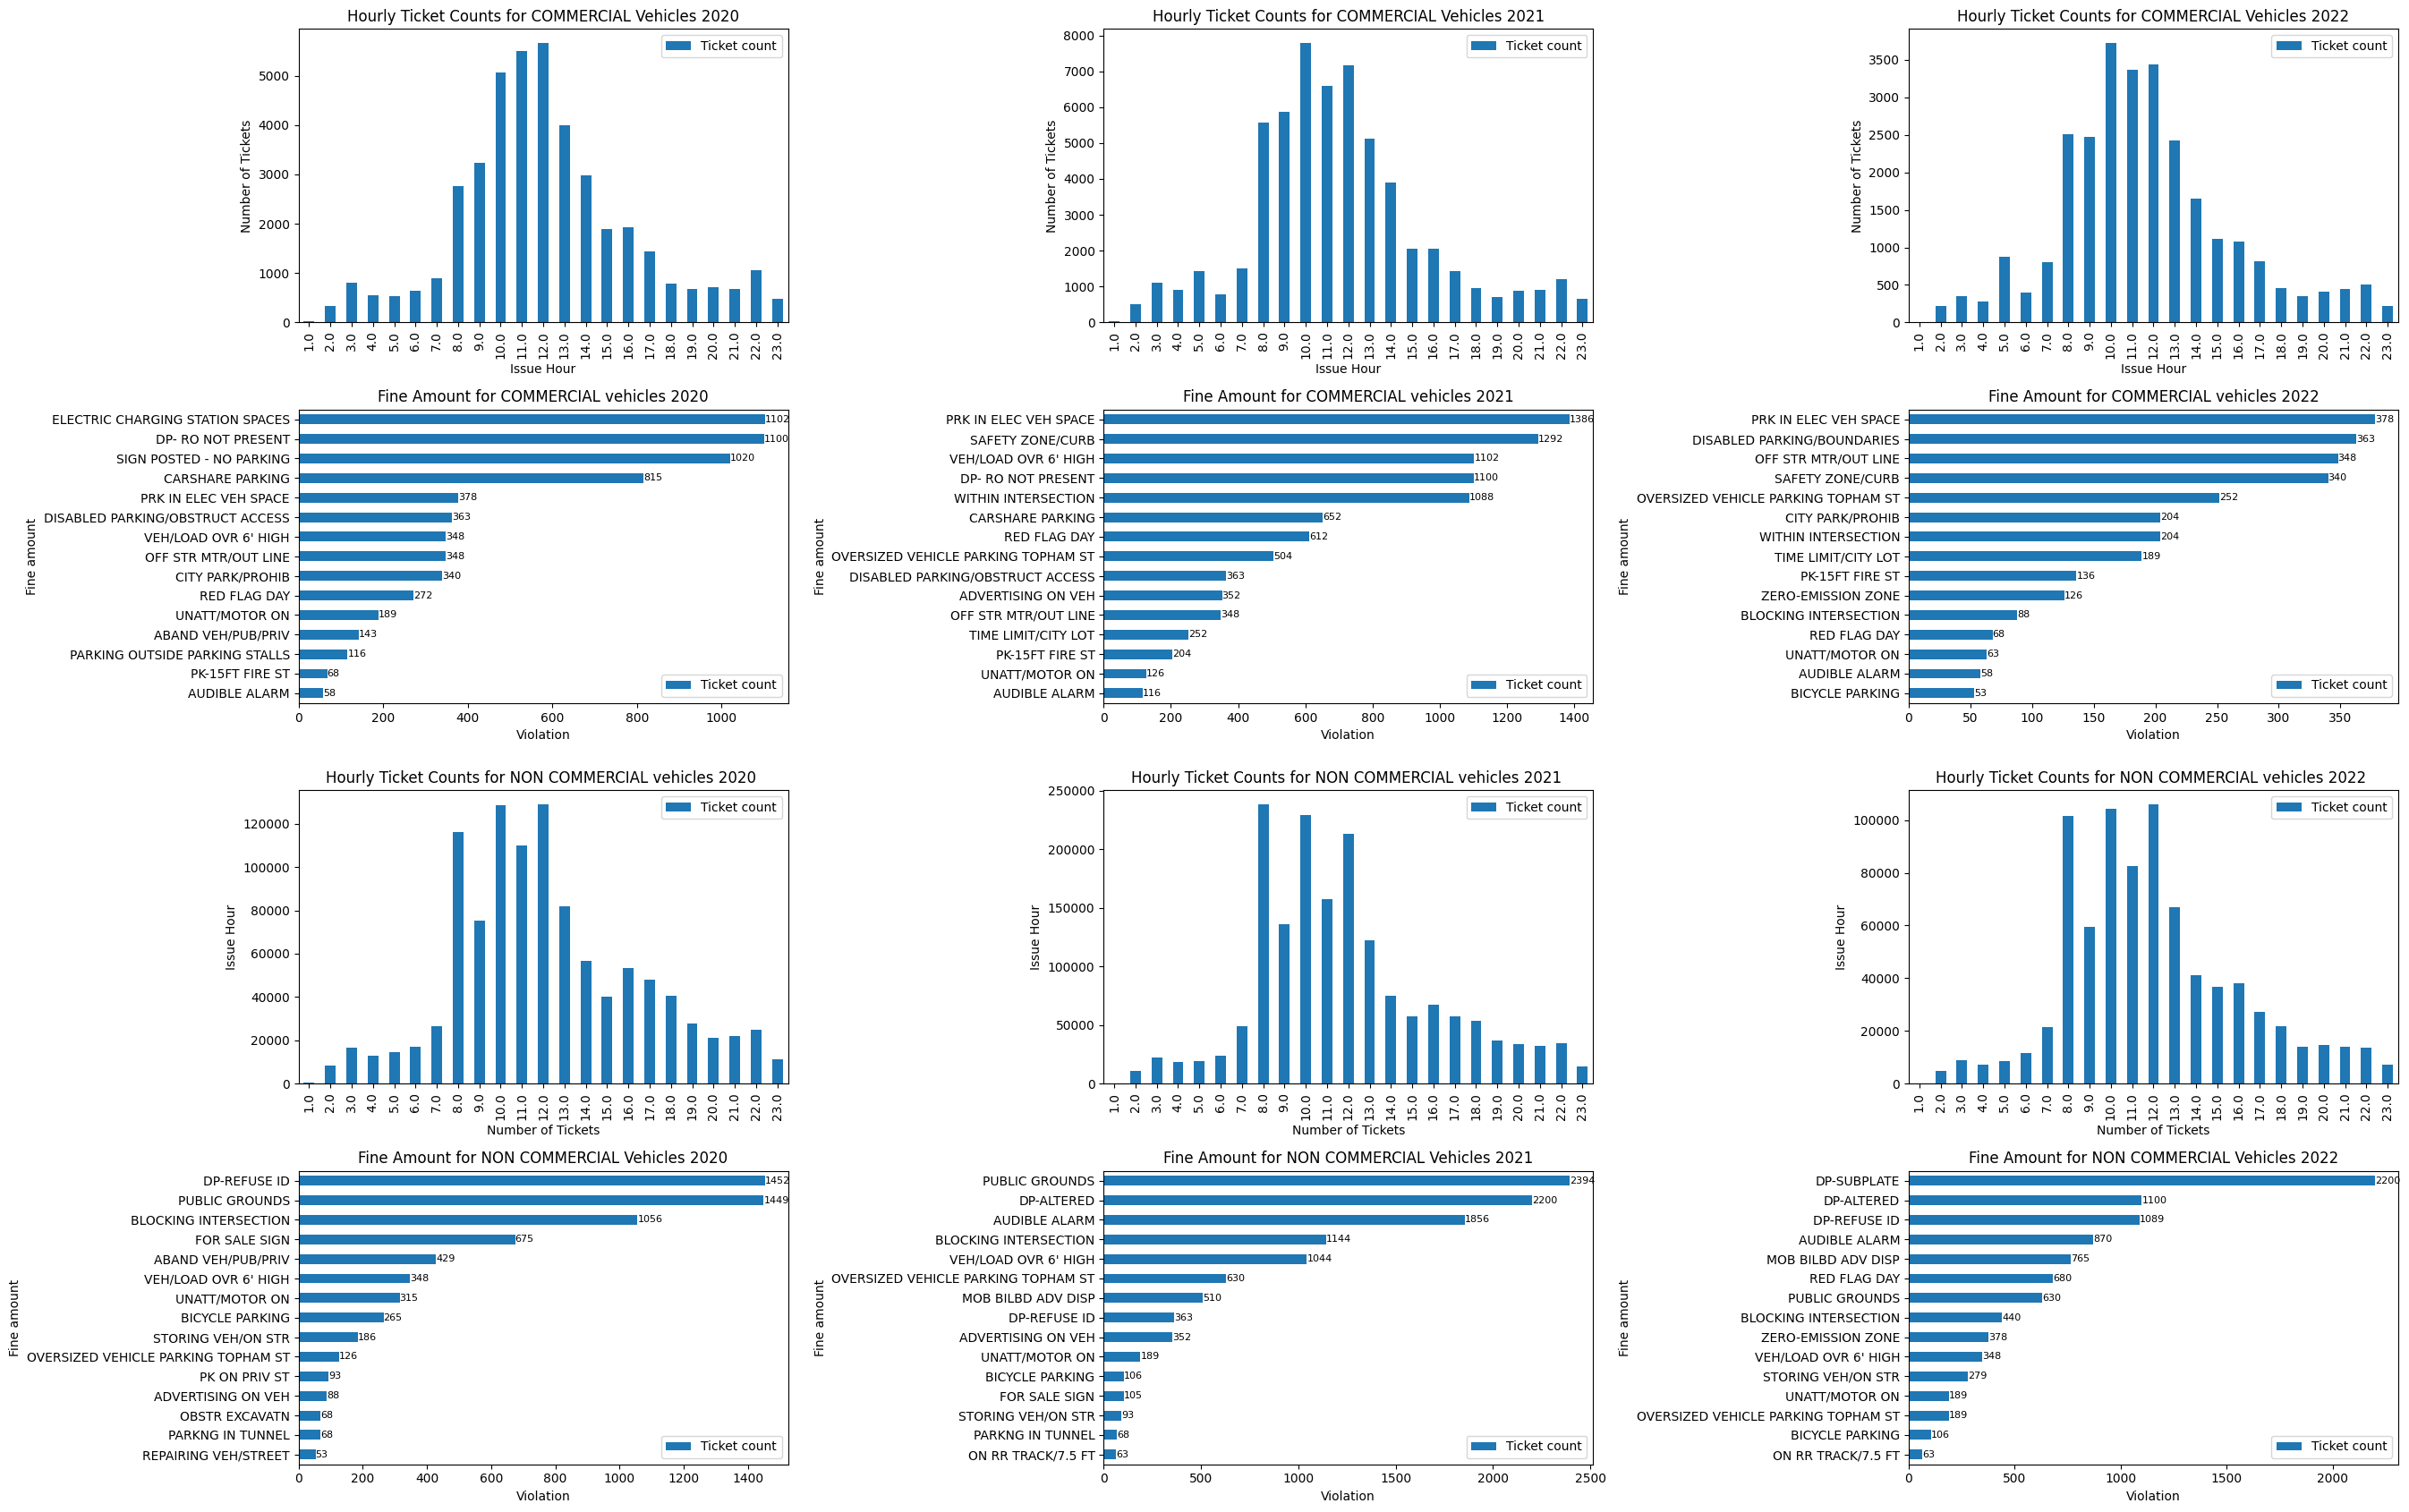

In [ ]:
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(27, 17))

# Plot Fine Amounts for Commercial Vehicles
for i, cost_data in enumerate(data_frames_meta):
    cost_sum = cost_data.groupby(cost_data["Violation Description"])["Fine amount"].sum()
    cost_sum = cost_sum.sort_values(ascending=True)
    top_15_cost_sum = cost_sum.head(15)
    ax = axes[1, i]
    top_15_cost_sum.plot(kind='barh', ax=ax, label="Ticket count")
    ax.set_xlabel("Violation")
    ax.set_ylabel("Fine amount")
    ax.set_title(f"Fine Amount for COMMERCIAL vehicles {2020 + i}")
    ax.legend()
    #ax.grid()

    # Add value annotations
    for bar in ax.containers:
        ax.bar_label(bar, fmt='%d', label_type='edge', fontsize=8)

# Plot Hourly Ticket Counts for Commercial Vehicles
for i, year_data in enumerate(data_frames_meta):
    hourly_counts = year_data.groupby(year_data["Issue time"].apply(lambda x: x.hour))["Ticket number"].count()
    #hourly_counts = hourly_counts.sort_values(ascending=True)
    ax = axes[0, i]
    hourly_counts.plot(kind='bar', ax=ax, label="Ticket count")
    ax.set_xlabel("Issue Hour")
    ax.set_ylabel("Number of Tickets")
    ax.set_title(f"Hourly Ticket Counts for COMMERCIAL Vehicles {2020 + i}")
    ax.legend()
    #ax.grid()

    # Add value annotations
    # for bar in ax.containers:
    #     ax.bar_label(bar, fmt='%d', label_type='edge', fontsize=8)

# Plot Hourly Ticket Counts for NON COMMERCIAL Vehicles
for i, year_data in enumerate(data_frames_non_meta):
    hourly_counts = year_data.groupby(year_data["Issue time"].apply(lambda x: x.hour))["Ticket number"].count()
   # hourly_counts = hourly_counts.sort_values(ascending=True)
    ax = axes[2, i]
    hourly_counts.plot(kind='bar', ax=ax, label="Ticket count")
    ax.set_ylabel("Issue Hour")
    ax.set_xlabel("Number of Tickets")
    ax.set_title(f"Hourly Ticket Counts for NON COMMERCIAL vehicles {2020 + i} ")
    ax.legend()
    #ax.grid()

    # Add value annotations
    # for bar in ax.containers:
    #     ax.bar_label(bar, fmt='%d', label_type='edge', fontsize=8)

for i, cost_data in enumerate(data_frames_non_meta):
    cost_sum = cost_data.groupby(cost_data["Violation Description"])["Fine amount"].sum()
    cost_sum = cost_sum.sort_values(ascending=True)
    top_15_cost_sum = cost_sum.head(15)
    ax = axes[3, i]
    top_15_cost_sum.plot(kind='barh', ax=ax, label="Ticket count")
    ax.set_xlabel("Violation")
    ax.set_ylabel("Fine amount")
    ax.set_title(f"Fine Amount for NON COMMERCIAL Vehicles {2020 + i}")
    ax.legend()
    #ax.grid()

    # Add value annotations
    for bar in ax.containers:
      ax.bar_label(bar, fmt='%d', label_type='edge', fontsize=8)

# Adjust spacing between subplots
plt.subplots_adjust(hspace=1)

plt.tight_layout()
plt.show()


##7. Visualizing Tickets issued to commercial vehicles and non commercial vehicles in Apple time range

In [ ]:
commercial_vehicles_2020_apple = commercial_vehicles_data[(commercial_vehicles_data['Issue Date'] < '01-01-2021') & (commercial_vehicles_data['Issue Date']>='01-13-2020')]

In [ ]:
commercial_vehicles_2021_apple = commercial_vehicles_data[(commercial_vehicles_data['Issue Date'] <= '10-26-2021') & (commercial_vehicles_data['Issue Date']>='01-01-2021')]

In [ ]:
non_commercial_vehicles_2020_apple = non_commercial_vehicles_data[(non_commercial_vehicles_data['Issue Date'] < '01-01-2021') & (non_commercial_vehicles_data['Issue Date']>='01-13-2020')]

In [ ]:
non_commercial_vehicles_2021_apple = non_commercial_vehicles_data[(non_commercial_vehicles_data['Issue Date'] <= '10-26-2021') & (non_commercial_vehicles_data['Issue Date']>='01-01-2021')]

In [ ]:
data_frames_apple = [commercial_vehicles_2020_apple, commercial_vehicles_2021_apple]
data_frames_non_apple = [non_commercial_vehicles_2020_apple, non_commercial_vehicles_2021_apple]

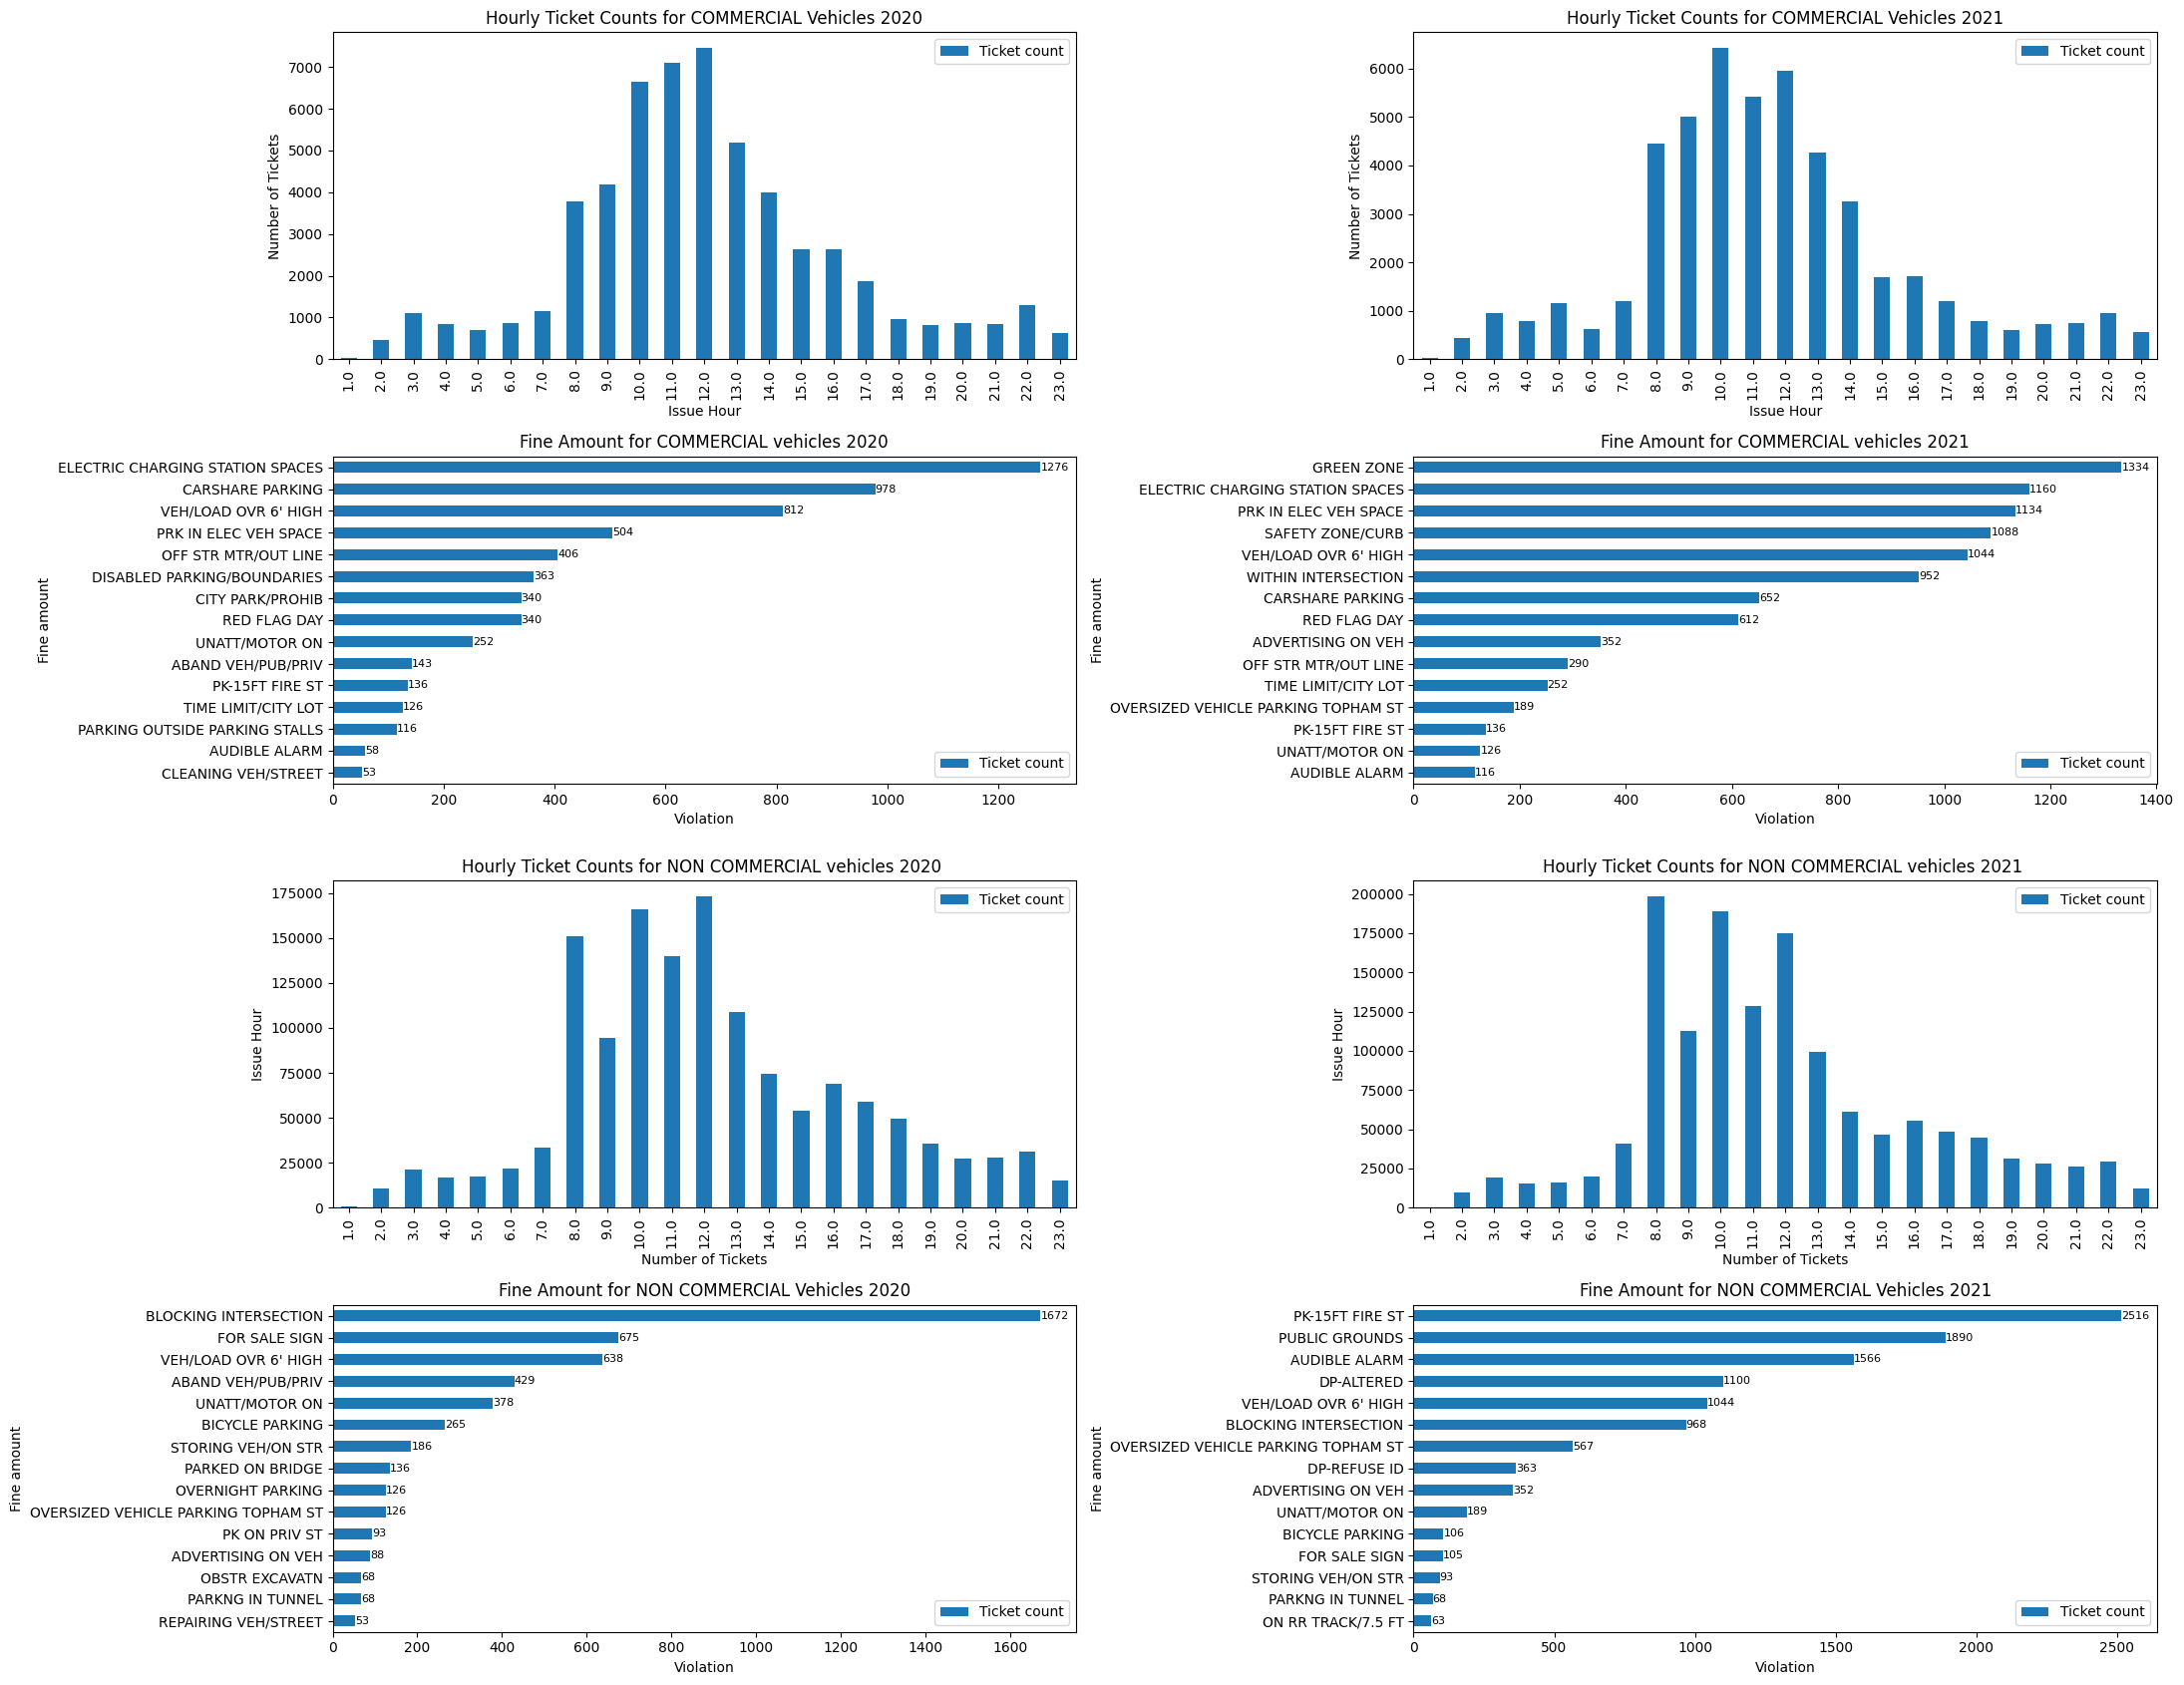

In [ ]:
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(22, 17))

# Plot Fine Amounts for Commercial Vehicles
for i, cost_data in enumerate(data_frames_apple):
    cost_sum = cost_data.groupby(cost_data["Violation Description"])["Fine amount"].sum()
    cost_sum = cost_sum.sort_values(ascending=True)
    top_15_cost_sum = cost_sum.head(15)
    ax = axes[1, i]
    top_15_cost_sum.plot(kind='barh', ax=ax, label="Ticket count")
    ax.set_xlabel("Violation")
    ax.set_ylabel("Fine amount")
    ax.set_title(f"Fine Amount for COMMERCIAL vehicles {2020 + i}")
    ax.legend()
    #ax.grid()

    # Add value annotations
    for bar in ax.containers:
        ax.bar_label(bar, fmt='%d', label_type='edge', fontsize=8)

# Plot Hourly Ticket Counts for Commercial Vehicles
for i, year_data in enumerate(data_frames_apple):
    hourly_counts = year_data.groupby(year_data["Issue time"].apply(lambda x: x.hour))["Ticket number"].count()
    #hourly_counts = hourly_counts.sort_values(ascending=True)
    ax = axes[0, i]
    hourly_counts.plot(kind='bar', ax=ax, label="Ticket count")
    ax.set_xlabel("Issue Hour")
    ax.set_ylabel("Number of Tickets")
    ax.set_title(f"Hourly Ticket Counts for COMMERCIAL Vehicles {2020 + i}")
    ax.legend()
    #ax.grid()

    # Add value annotations
    # for bar in ax.containers:
    #     ax.bar_label(bar, fmt='%d', label_type='edge', fontsize=8)

# Plot Hourly Ticket Counts for NON COMMERCIAL Vehicles
for i, year_data in enumerate(data_frames_non_apple):
    hourly_counts = year_data.groupby(year_data["Issue time"].apply(lambda x: x.hour))["Ticket number"].count()
   # hourly_counts = hourly_counts.sort_values(ascending=True)
    ax = axes[2, i]
    hourly_counts.plot(kind='bar', ax=ax, label="Ticket count")
    ax.set_ylabel("Issue Hour")
    ax.set_xlabel("Number of Tickets")
    ax.set_title(f"Hourly Ticket Counts for NON COMMERCIAL vehicles {2020 + i} ")
    ax.legend()
    #ax.grid()

    # Add value annotations
    # for bar in ax.containers:
    #     ax.bar_label(bar, fmt='%d', label_type='edge', fontsize=8)

for i, cost_data in enumerate(data_frames_non_apple):
    cost_sum = cost_data.groupby(cost_data["Violation Description"])["Fine amount"].sum()
    cost_sum = cost_sum.sort_values(ascending=True)
    top_15_cost_sum = cost_sum.head(15)
    ax = axes[3, i]
    top_15_cost_sum.plot(kind='barh', ax=ax, label="Ticket count")
    ax.set_xlabel("Violation")
    ax.set_ylabel("Fine amount")
    ax.set_title(f"Fine Amount for NON COMMERCIAL Vehicles {2020 + i}")
    ax.legend()
    #ax.grid()

    # Add value annotations
    for bar in ax.containers:
      ax.bar_label(bar, fmt='%d', label_type='edge', fontsize=8)

# Adjust spacing between subplots
plt.subplots_adjust(hspace=1)

plt.tight_layout()
plt.show()


##8. Looking at more Possible Slicings - Top 10 violation descriptions in all three years

### Violation Vs Count of tickets in all three years combined (Google time scale)

In [ ]:
grouped_vd = df.groupby('Violation code')['Ticket number'].count().reset_index(name='Total Tickets')

In [ ]:
top_10_vd = grouped_vd.nlargest(10, 'Total Tickets')

In [ ]:
top_10_vd

,Violation code,Total Tickets
303,80.69BS,1406146
465,88.13B+,910964
290,80.56E4+,618973
292,80.58L,403191
227,5204A-,299579
302,80.69B,225047
201,5200,182136
301,80.69AP+,129729
304,80.69C,125331
293,80.61,108600


In [ ]:
top_10_data_vd = df[df['Violation code'].isin(top_10_vd['Violation code'])]

In [ ]:
top_10_data_vd.groupby('Violation code')['Violation Description'].unique().reset_index()

,Violation code,Violation Description
0,5200,"[DISPLAY OF PLATES, nan]"
1,5204A-,[DISPLAY OF TABS]
2,80.56E4+,[RED ZONE]
3,80.58L,[PREFERENTIAL PARKING]
4,80.61,[STANDNG IN ALLEY]
5,80.69AP+,[NO STOP/STANDING]
6,80.69B,[NO PARKING]
7,80.69BS,[NO PARK/STREET CLEAN]
8,80.69C,[PARKED OVER TIME LIMIT]
9,88.13B+,"[METER EXP., DISPLAY OF PLATES]"


Tickets issued on NO PARK/STREET CLEAN violation are highest followed by METER EXPIRED in all the three years combined.

In [ ]:
nopark_streetclean = dfg[dfg['Violation Description']=='NO PARK/STREET CLEAN']

In [ ]:
monthly_violation_counts = nopark_streetclean.groupby(
    [nopark_streetclean['Issue Date'].dt.year, nopark_streetclean['Issue Date'].dt.month]
)['Ticket number'].count()

In [ ]:
weekday_violation_counts = nopark_streetclean.groupby(
    [nopark_streetclean['Issue Date'].dt.strftime('%A')]
)['Ticket number'].count()

In [ ]:
weekday_violation_counts

Issue Date
Friday       167913
Monday       203030
Saturday        300
Sunday          351
Thursday     269631
Tuesday      235545
Wednesday    241276
Name: Ticket number, dtype: int64

In [ ]:
weekday_violation_counts = weekday_violation_counts

No street cleaning on Sundays and Saturdays, so lesser tickets issued.
Possible that the street cleaning sign boards aren't removed?

In [ ]:
hourly_violation_counts = nopark_streetclean.groupby(
    [nopark_streetclean['Issue time'].apply(lambda x: x.hour)]
)['Ticket number'].count()

In [ ]:
hourly_violation_counts = hourly_violation_counts.reset_index()

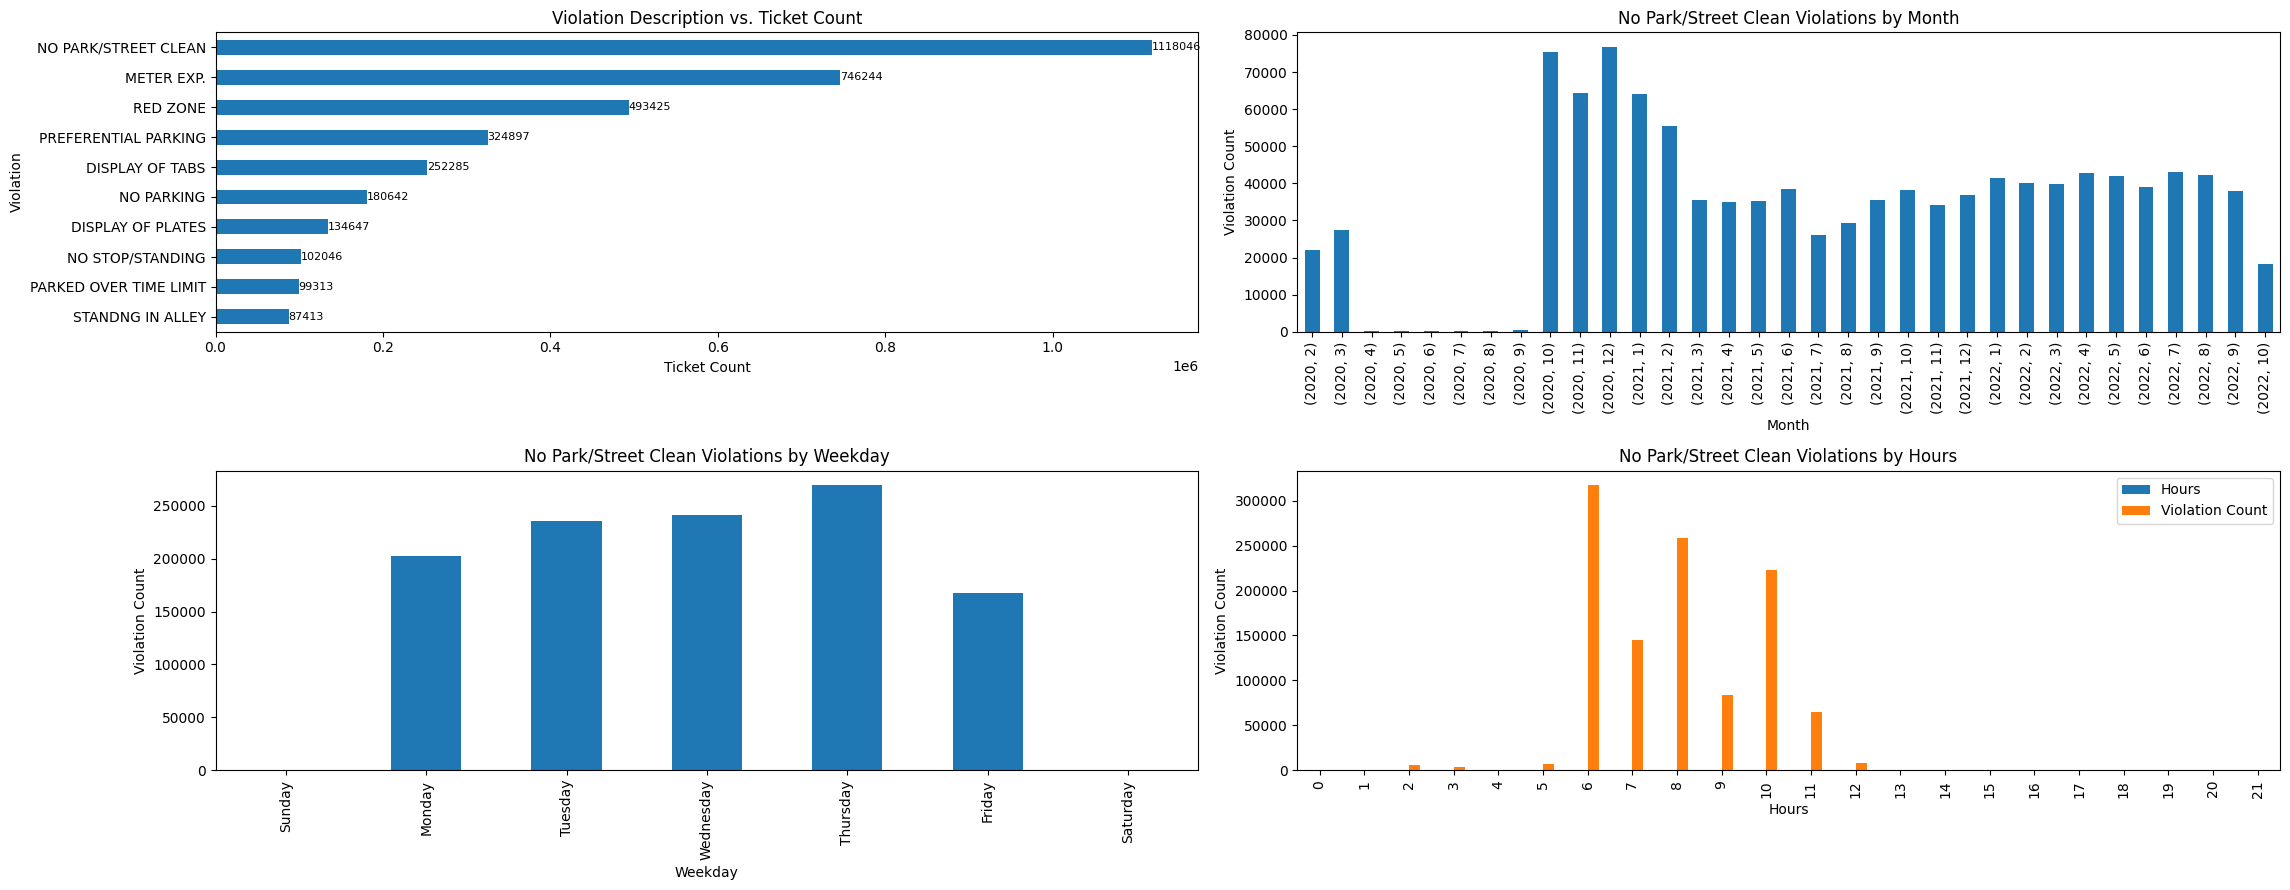

In [ ]:

fig, axes = plt.subplots(2, 2, figsize=(23, 9))

# Subplot 1: Violation Description vs. Ticket Count
ax1 = axes[0 , 0]
ticket_count = top_10_data_vd.groupby('Violation Description')['Ticket number'].count()
ticket_count = ticket_count.sort_values(ascending=True)
ticket_count.plot(kind='barh', ax=ax1)
ax1.set_xlabel("Ticket Count")
ax1.set_ylabel("Violation")
ax1.set_title("Violation Description vs. Ticket Count")

#Subplot 2
ax2 = axes [0,1]
monthly_violation_counts.columns = ['Month', 'Violation Count']
monthly_violation_counts.plot(kind = 'bar', ax = ax2)
ax2.set_xlabel('Month')
ax2.set_ylabel('Violation Count')
ax2.set_title('No Park/Street Clean Violations by Month')

#Subplot 3
ax3 = axes[1,0]
weekday_violation_counts.columns = ['Weekday', 'Violation Count']
desired_order = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']

# Reindex the series to arrange it in the desired order
weekday_violation_counts = weekday_violation_counts.reindex(desired_order)

# Create the bar plot
weekday_violation_counts.plot(kind='bar', ax = ax3)

# for index, row in weekday_violation_counts.iterrows():
#     ax2.text(row['Violation Count'], row['Weekday'], str(row['Violation Count']), ha='left', va='center')
ax3.set_xlabel('Weekday')
ax3.set_ylabel('Violation Count')
ax3.set_title('No Park/Street Clean Violations by Weekday')

# Subplot 3: No Park/Street Clean Violations by Hours
ax4 = axes[1,1]
hourly_violation_counts.columns = ['Hours', 'Violation Count']
#hourly_violation_counts = hourly_violation_counts.sort_values(by='Violation Count', ascending=True)
hourly_violation_counts.plot(kind = 'bar', ax = ax4)
# for index, row in hourly_violation_counts.iterrows():
#     ax3.text(row['Violation Count'], row['Hours'], str(row['Violation Count']), ha='left', va='center')
ax4.set_ylabel('Violation Count')
ax4.set_xlabel('Hours')
ax4.set_title('No Park/Street Clean Violations by Hours')

for bar in ax1.containers:
      ax1.bar_label(bar, fmt='%d', label_type='edge', fontsize=8)



# Adjust spacing between subplots
plt.tight_layout()

# Show the combined plot
plt.show()


Street cleaning seems to be scheduled in the morning hours more. Especially at morning 8 am to 12 pm.

In [ ]:
loc_nopark_counts = nopark_streetclean.groupby(
    [nopark_streetclean['Location']])['Ticket number'].count()

In [ ]:
loc_nopark_counts.sort_values(ascending= False).head(20)

Location
6321 COMMODORE SLOAT DR    361
5800 INTERCEPTOR ST        320
701 VETERAN AVE            299
700 VETERAN AVE            279
250 5TH ST W               274
601 VETERAN AVE            271
255 5TH ST W               258
6320 COMMODORE SLOAT DR    217
500 GAYLEY AVE             194
6301 COMMODORE SLOAT DR    190
5500 ETIWANDA AVE          180
13100 FOUNTAIN PARK DR     175
13800 MOORPARK ST          167
300 MAIN ST                166
8655 BELFORD AVE           163
125 4TH ST W               159
300 SUNSET AVE             148
1115 ELM DR                142
14800 CAMARILLO ST         139
7700 SIMPSON AVE           139
Name: Ticket number, dtype: int64

In [ ]:
streetclean_fineamount = dfg.groupby('Violation code')['Fine amount'].mean()

In [ ]:
streetclean_fineamount = streetclean_fineamount.reset_index()

In [ ]:
streetclean_fineamount.columns = ['Violation code', 'Mean Fine Amount']

In [ ]:
non_nan_streetclean = streetclean_fineamount.dropna(subset=['Mean Fine Amount'], inplace = False)

In [ ]:
non_nan_streetclean.sort_values(by= ['Mean Fine Amount'], ascending =False)

,Violation code,Mean Fine Amount
93,2251157C,1100.0
85,22511.57A,1100.0
87,22511.57C,1100.0
86,22511.57B,1100.0
91,2251157A,1100.0
...,...,...
148,242425,0.0
149,2440,0.0
315,80361A,0.0
314,80361,0.0


In [ ]:
#Fine amount for NO PARK/STREET CLEAN
non_nan_streetclean[non_nan_streetclean['Violation code'] == '80.69BS']

,Violation code,Mean Fine Amount
297,80.69BS,72.999394


In [ ]:
non_nan_streetclean[(non_nan_streetclean['Mean Fine Amount'] < 72) & (non_nan_streetclean['Mean Fine Amount']!= 0)].nunique

<bound method DataFrame.nunique of     Violation code  Mean Fine Amount
0              000              68.0
1              014              50.0
8          1564250              35.0
13           21113              40.0
14          21113A              63.0
..             ...               ...
488          8940A              58.0
489          8940B              58.0
490           8942              63.0
491           8943              68.0
492           8946              58.0

[166 rows x 2 columns]>

In [ ]:
non_nan_streetclean['Mean Fine Amount'].sort_values(ascending =False).unique()

array([1100.        , 1065.72093023, 1000.        ,  510.        ,
        500.        ,  485.0397382 ,  396.05239708,  388.09435013,
        379.5045045 ,  370.14245014,  363.        ,  362.98130531,
        362.69205298,  359.72131148,  353.        ,  345.        ,
        343.42857143,  300.        ,  293.        ,  292.97519892,
        255.        ,  163.        ,  143.        ,  128.        ,
        126.42857143,  123.51515152,  105.        ,   98.05384615,
         98.        ,   95.85058978,   93.        ,   92.99943456,
         92.99912281,   92.99754559,   92.99519669,   92.9834549 ,
         92.97574553,   92.96450304,   88.        ,   80.        ,
         79.38392857,   74.72801636,   74.5060241 ,   73.        ,
         72.99959588,   72.99939448,   72.99840881,   70.        ,
         69.61538462,   68.41666667,   68.        ,   67.99949205,
         67.99934255,   67.99415054,   67.99120433,   63.        ,
         62.99991558,   62.99775371,   62.99602993,   62.93947

In [ ]:
nopark_streetclean['Agency Description'].unique()

array(['56 - DOT - CENTRAL', '53 - DOT - VALLEY', '54 - DOT - HOLLYWOOD',
       '51 - DOT - WESTERN', '55 - DOT - SOUTHERN',
       '57 - HABITUAL VIOLATORS'], dtype=object)

In [ ]:

agency_counts = nopark_streetclean.groupby(
    [nopark_streetclean['Agency Description']]
)['Ticket number'].count()

In [ ]:
agency_counts = agency_counts.reset_index()

In [ ]:
# agency_counts.columns = ['Agency Description', 'Violation Count']
# plt.figure(figsize=(10, 6))
# plt.bar(agency_counts['Agency Description'], agency_counts['Violation Count'])
# for index, row in agency_counts.iterrows():
#     plt.text(row['Agency Description'], row['Violation Count'], str(row['Violation Count']), ha='center', va='bottom')
# plt.xlabel('Agency Description')
# plt.ylabel('Violation Count')
# plt.title('No Park/Street Clean Violations by Agency')
# plt.xticks(rotation = 45)
# #plt.tight_layout()
# plt.show()

### Violation Vs Ticket count each year

In [ ]:
top_10_data_vd_2020 = top_10_data_vd[(top_10_data_vd['Issue Date'] < '01-01-2021') & (top_10_data_vd['Issue Date']>='02-15-2020')]

In [ ]:
top_10_data_vd_2021 = top_10_data_vd[(top_10_data_vd['Issue Date'] < '01-01-2022') & (top_10_data_vd['Issue Date']>='01-01-2021')]

In [ ]:
top_10_data_vd_2022 = top_10_data_vd[(top_10_data_vd['Issue Date'] < '10-15-2022') & (top_10_data_vd['Issue Date']>='01-01-2022')]

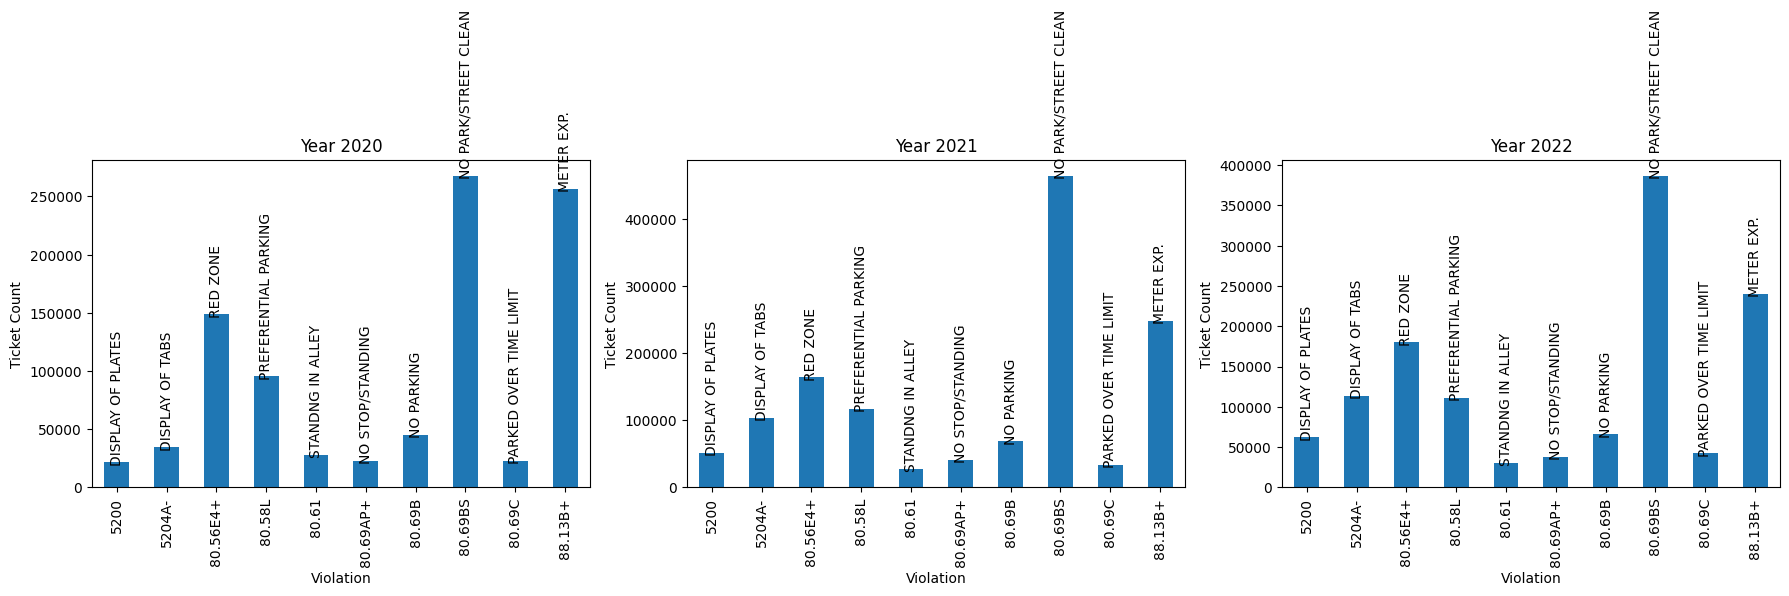

In [ ]:

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))
dfs = [top_10_data_vd_2020, top_10_data_vd_2021, top_10_data_vd_2022]
for i, year_data in enumerate(dfs):
    ticket_count = year_data.groupby('Violation code')['Ticket number'].count().reset_index()
    ax = ticket_count.plot.bar(x='Violation code', y='Ticket number', legend=False, ax=axes[i])
    for code, row in ticket_count.iterrows():
        code_value = row['Violation code']
        desc = dfg.loc[dfg['Violation code'] == code_value, 'Violation Description'].iloc[0]
        ax.text(code, row['Ticket number'], desc,rotation=90, ha='center')

    ax.set_xlabel("Violation")
    ax.set_ylabel("Ticket Count")
    ax.set_title(f"Year 20{i+20}")
plt.tight_layout()
plt.show()


### Fine amount for the top 10 violations

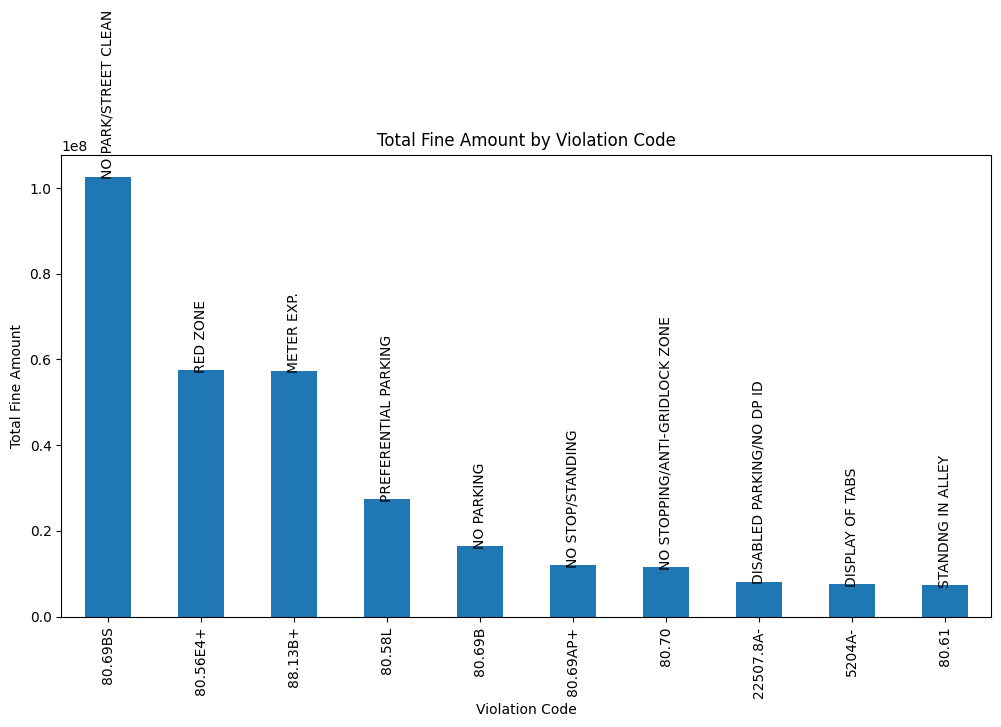

In [ ]:

fine_amount_by_code = df.groupby('Violation code')['Fine amount'].sum()
# Get the corresponding violation descriptions for each violation code
violation_descriptions = df.groupby('Violation code')['Violation Description'].first()
# Sort the fine amounts in descending order
fine_amount_by_code = fine_amount_by_code.sort_values(ascending=False)
# Select the top N violation codes to display (you can adjust this number)
top_n = 10
top_fine_amounts = fine_amount_by_code.head(top_n)
top_violation_descriptions = violation_descriptions[top_fine_amounts.index]
plt.figure(figsize=(12, 6))
top_fine_amounts.plot(kind='barh')
plt.xlabel("Violation Code")
plt.ylabel("Total Fine Amount")
plt.title("Total Fine Amount by Violation Code")
for i, amount in enumerate(top_fine_amounts):
    plt.text(i, amount + 100000, top_violation_descriptions.iloc[i], rotation=90, ha='center')

plt.show()


In [ ]:
top_fine_amounts

Violation code
80.69BS      1.026478e+08
80.56E4+     5.756421e+07
88.13B+      5.739054e+07
80.58L       2.741690e+07
80.69B       1.642828e+07
80.69AP+     1.206470e+07
80.70        1.156273e+07
22507.8A-    8.177326e+06
5204A-       7.489350e+06
80.61        7.384800e+06
Name: Fine amount, dtype: float64

## Miscellaneous





In [ ]:
# body_style_tickets = df.groupby(df['Body Style Description']).size()
# body_style_tickets = body_style_tickets.to_frame().reset_index()
# body_style_tickets.columns = ['Body Style Description', 'Counts']
# body_style_tickets.sort_values(by=['Counts'], inplace=True)

# print(body_style_tickets)


# df_commercial = df.loc[df['Body Style Description'] == 'COMMERCIAL']
# type_of_tickets_commercial = df_commercial.groupby(df_commercial['Violation Description']).size()
# type_of_tickets_commercial = type_of_tickets_commercial.to_frame().reset_index()
# type_of_tickets_commercial.columns = ['Violation Description', 'Counts']
# type_of_tickets_commercial.sort_values(by=['Counts'], inplace=True)


# top_5_tickets_commercial = type_of_tickets_commercial.tail(5)
# print(top_5_tickets_commercial.to_string())


# fig = plt.figure(figsize=(10,6))
# plt.barh(top_5_tickets_commercial['Violation Description'], top_5_tickets_commercial['Counts'])
# plt.xlabel("Type of ticket")
# plt.ylabel("Ticket Count")
# plt.title("Commercial Vehicles top 5 tickets in 2020")
# plt.show()
# df_fil = df[df['Issue Date']<'12-31-2022']
# plt.figure(figsize = (20,8))
# per_day_count = df_fil.groupby(df_fil['Issue Date']).size()
# per_day_count = per_day_count.to_frame().reset_index()
# per_day_count.columns = ['Issue Date', 'Counts']
# per_day_count.sort_values(by="Issue Date")
# #per_day_count['Issue Date'] = per_day_count[per_day_count['Issue Date'] <= '12-31-2022']
# per_day_count['Rolling7DayAvg'] = per_day_count['Counts'].rolling(window=7).mean()

# # find the baseline count and percentage change from that
# df_Jan_13 = per_day_count.loc[per_day_count['Issue Date'] == '2020-01-13']
# df_Jan_13 = df_Jan_13['Counts'].item()
# per_day_count['pct_change'] = ((per_day_count['Counts'] - df_Jan_13)*100)/df_Jan_13

# # plot
# plt.plot(per_day_count['Issue Date'], per_day_count['pct_change'])
# plt.title('Percent Change with baseline as Jan 13')
# plt.xlabel('Dates')
# plt.ylabel('Percent Change')
# plt.show()
# df_2021 = df[(df['Issue Date'] < '01-01-2022') & (df['Issue Date']>='01-01-2021')]
# df_2020 = df[(df['Issue Date'] < '01-01-2021') & (df['Issue Date']>='01-01-2020')]
# df_2019 = df[(df['Issue Date'] < '01-01-2020') & (df['Issue Date']>='01-01-2019')]
# per_day_count = df.groupby(df['Issue Date']).size()
# per_day_count = per_day_count.to_frame().reset_index()
# per_day_count.columns = ['Issue Date', 'Counts']
# per_day_count.sort_values(by="Issue Date")


# # rolling 7 day average
# per_day_count['Rolling7DayAvg'] = per_day_count['Counts'].rolling(window=7).mean()

# # Average per day
# avg_per_day_2020 = df_2020.shape[0]/366
# avg_per_day_2019 = df_2019.shape[0]/365


# fig, (ax1, ax2) = plt.subplots(2, gridspec_kw={'height_ratios': [2.5, 1]})

# ax1.plot(per_day_count['Issue Date'], per_day_count['Rolling7DayAvg'])
# ax1.axhline(y = avg_per_day_2020, color='b', linestyle='--', label = "")
# ax1.axhline(y = avg_per_day_2019, color='r', linestyle='--', label = "")
# ax1.text('2020-07-05', avg_per_day_2020 + 120, "2020 avg / day")
# ax1.text('2020-07-05', avg_per_day_2019 + 120, "2019 avg / day")
# plt.setp(ax1, ylabel='7 Day Moving Average of parking violations count in 2020')



# dates_df = per_day_count['Issue Date']
# dates_df = dates_df.to_frame()
# dates_df.columns = ['Issue Date']
# zero_line = [0]*(dates_df.shape[0])
# ax2.plot(dates_df, zero_line, color = 'w')
# ax2.vlines('2020-03-19', 0, 4, linestyles = '-', label = 'Phase 1', color = 'cornflowerblue')
# ax2.vlines('2020-05-09', 0, 4, linestyles = '-', label = 'Phase 2', color = 'cornflowerblue')
# ax2.vlines('2020-06-11', 0, 4, linestyles = '-', label = 'Phase 3', color = 'cornflowerblue')
# ax2.vlines('2020-06-27', 0, 4, linestyles = '-', label = 'Phase 2', color = 'cornflowerblue')
# ax2.vlines('2020-11-20', 0, 4, linestyles = '-', label = 'Phase 1.5', color = 'cornflowerblue')

# ax2.axhline(y = 0, xmin=0.05, xmax=0.23, color='royalblue', linestyle='-.', label = "")
# ax2.axhline(y = 1, xmin=0.247, xmax=0.36, color='red', linestyle='-.', label = "")
# ax2.axhline(y = 2, xmin=0.375, xmax=0.44, color='orange', linestyle='-.', label = "")
# ax2.axhline(y = 3, xmin=0.452, xmax=0.485, color='green', linestyle='-.', label = "")
# ax2.axhline(y = 2, xmin=0.495, xmax=0.85, color='orange', linestyle='-.', label = "")
# ax2.axhline(y = 1.5, xmin=0.86, xmax=0.99, color='brown', linestyle='-.', label = "")

# ax2.text('2020-02-05', 0.2, 'P 0')
# ax2.text('2020-04-11', 1.2, 'P 1')
# ax2.text('2020-05-25', 2.2, 'P 2')
# ax2.text('2020-06-15', 3.2, 'P 3')
# ax2.text('2020-08-31', 2.2, 'P 2')
# ax2.text('2020-12-14', 1.7, 'P 1.5')

# ax1.spines['bottom'].set_visible(False)
# ax2.spines['top'].set_visible(False)
# # ax1.spines['right'].set_visible(False)
# # ax1.spines['left'].set_visible(False)

# ax1.tick_params(
#     axis='x',          # changes apply to the x-axis
#     which='both',      # both major and minor ticks are affected
#     bottom=False,      # ticks along the bottom edge are off
#     top=False,         # ticks along the top edge are off
#     labelbottom=False)

# plt.setp(ax2, ylabel='Phases')

# for ax in fig.get_axes():
#     ax.label_outer()

# plt.show()

In [ ]:
df.columns

Index(['Ticket number', 'Issue Date', 'Issue time', 'Meter Id', 'Marked Time',
       'RP State Plate', 'Plate Expiry Date', 'VIN', 'Make', 'Body Style',
       'Color', 'Location', 'Route', 'Agency', 'Violation code',
       'Violation Description', 'Fine amount', 'Latitude', 'Longitude',
       'Agency Description', 'Color Description', 'Body Style Description'],
      dtype='object')

In [ ]:
df['VIN'].notna()

0          False
1          False
2          False
3          False
4          False
           ...  
5757902    False
5757903    False
5757904    False
5757905    False
5757906    False
Name: VIN, Length: 5757223, dtype: bool

In [ ]:
df['Latitude']

0          6.458720e+06
1          6.418771e+06
2          6.454501e+06
3          6.460137e+06
4          6.441622e+06
               ...     
5757902    6.419829e+06
5757903    6.456859e+06
5757904    6.474061e+06
5757905    6.455838e+06
5757906    6.473777e+06
Name: Latitude, Length: 5757223, dtype: float64

In [ ]:
df['Body Style'].unique()

array(['PA', 'PU', 'VN', 'MH', 'CM', 'BU', 'TK', 'TR', 'OT', 'MC', 'LM',
       'BO', nan, 'SU', 'MS', 'RV', 'UT', 'CO', 'TL', 'TT', 'TC', '4D',
       '2D', 'HS', '4H', 'SV', 'PK', 'CC', 'CA', 'SE', 'JE', 'US', 'VS',
       '2H', 'SW', 'TI', 'FR', 'GO', 'MO', 'DU', 'RU', 'BT', 'VE', 'CV',
       'MR', 'CP', 'SC', 'PM', 'WN', 'WG', 'C4', 'HC', 'CH', 'LI', 'GC',
       'JA', 'VC', '4W', 'HB', 'RF', 'MJ', 'RY', 'AT', 'M4', 'WA', 'RR',
       'WF', 'ST', 'CR', 'MB', 'R', 'MT', 'VA', 'WT', 'XI', 'DS', 'SH',
       'VH', 'TX', 'R4', 'U', 'MP', 'PI', 'TA', 'TS', 'BV', 'HH', 'PC',
       'HZ', 'MD', 'HA', 'SD', '45', 'TO', 'RB', '02', 'WK', 'FB', 'RX',
       'BX', 'VT', 'ED', 'YY', 'LL', 'DP', 'PT', 'UP', 'RI', 'SL', 'NX',
       'CB', '4C', 'WH', 'SR', 'SB', 'NR', 'I1', '2T', 'F7', 'I5', 'EC',
       'MV', 'XO', 'RC', 'V9', 'S2', 'TV', 'SO', 'SA', 'NM', '2A', '31',
       'CU', '4T', '24', 'RA', '1V', 'RS', '3F', 'P3', '01', 'I3', '62',
       'E3', 'VP', '95', 'AU'], dtype=object)

In [ ]:
violation_counts = df['Violation Description'].value_counts()
Q1 = violation_counts.quantile(0.25)
Q3 = violation_counts.quantile(0.75)
IQR = Q3 - Q1
threshold = 1.5 * IQR
outliers = violation_counts[
    (violation_counts < (Q1 - threshold)) | (violation_counts > (Q3 + threshold))]

print("Outliers:")
print(outliers)

Outliers:
NO PARK/STREET CLEAN              1406146
METER EXP.                         910963
RED ZONE                           618973
PREFERENTIAL PARKING               403191
DISPLAY OF TABS                    299580
NO PARKING                         225047
DISPLAY OF PLATES                  181544
NO STOP/STANDING                   129729
PARKED OVER TIME LIMIT             125331
STANDNG IN ALLEY                   108600
BLOCKING DRIVEWAY                   77710
WHITE ZONE                          74402
NO STOPPING/ANTI-GRIDLOCK ZONE      71141
DOUBLE PARKING                      68301
FIRE HYDRANT                        66302
NO STOP/STAND                       58962
Name: Violation Description, dtype: int64


##9. Limitations of Parking Data

1. All columns except 'Ticket Count' and 'Violation code' has NaN values.
2. The format of 'Latitude' and 'Longitude' seems unknown.
3. 'Body Style' column codes doesn't seem to match any reference in the dataset.
4. The data is biased towards specific types of violations, which could skew the results and not provide a comprehensive view of popular times citywide.